In [5]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [7]:
# sage, srgnn 중 선택
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))
save_dir = f'../output/{embed_model}_rule'

In [15]:
for segment in [3,5,8,11]:
    print(f'segment number: {segment}')
    with open(save_dir + f'/{embed_model}_seg_rule_extract{segment}.txt', 'r') as f:
        full_text = f.read()
    or_list = full_text.split('[OR]')
    smaller_rule = []
    for or_rule in or_list:
        rule_list = or_rule.split('[AND]')
        for rule in rule_list:
            rule = rule.strip()
            
            for operator in ['<=', '<']:
                if operator in rule:
                    # key: genre, value: time
                    # key, value = rule.split(operator)
                    # value = float(value)
                    # if value not in rule_dict[key]:
                    #     rule_dict[key].append(value)
                    # break  
                    if rule not in smaller_rule:
                        print(rule)
                        smaller_rule.append(rule)
                    break

    print()

segment number: 3
K013(교양/정보_일반)<=4361.688
D002(연예/오락_퀴즈)<=0.25
J016(시사/다큐_일반)<=382.4
J016(시사/다큐_일반)<=331.3
D003(연예/오락_라이프·휴먼)<=1081.9
A024(드라마_휴먼드라마)<=3443.85
B007(영화_멜로)<=2.9
B008(영화_모험)<=2.75
D015(연예/오락_인포테인먼트)<=160.65
K004(교양/정보_예술/문화)<=3.4
K004(교양/정보_예술/문화)<=18.7
A015(드라마_액션)<=1.25

segment number: 5
D005(연예/오락_버라이어티)<=7598.403
I004(뉴스_국제)<=1.5
K013(교양/정보_일반)<=22137.07

segment number: 8
K004(교양/정보_예술/문화)<=272.75
I004(뉴스_국제)<=0.3
C005(만화_모험(adventure))<=59.55
B010(영화_미스터리/스릴러)<=238.7
B007(영화_멜로)<=19.15
K013(교양/정보_일반)<=22137.07
B024(영화_드라마)<=1235.775
K004(교양/정보_예술/문화)<=518.85
K011(교양/정보_의료건강)<=53.9

segment number: 11
D005(연예/오락_버라이어티)<=7598.403
B015(영화_액션)<=494.15
K007(교양/정보_방송/언론)<=351.35
G007(음악_뮤지컬/오페라)<=4.5
I004(뉴스_국제)<=1.5
B024(영화_드라마)<=1554.475
A024(드라마_휴먼드라마)<=1643.5



In [3]:
k=15
save_dir = f'../output/{embed_model}_rule'

rule_dict = defaultdict(list)
for i in range(k):

    with open(save_dir + f'/{embed_model}_seg_rule_extract{i}.txt', 'r') as f:
        full_text = f.read()

    or_list = full_text.split('[OR]')
    for or_rule in or_list:
        rule_list = or_rule.split('[AND]')
        for rule in rule_list:
            rule = rule.strip()
            
            for operator in ['<=', '<']:
                if operator in rule:
                    # key: genre, value: time
                    key, value = rule.split(operator)
                    value = float(value)
                    if value not in rule_dict[key]:
                        rule_dict[key].append(value)
                    break

# key: genre, value: time_list
# for key, value in rule_dict.items():
#     value.append(-float('inf'))
#     value.append(float('inf'))

0인 개수: 38
1100.55 이하인 개수: 721
0인 비율: 5.270 %


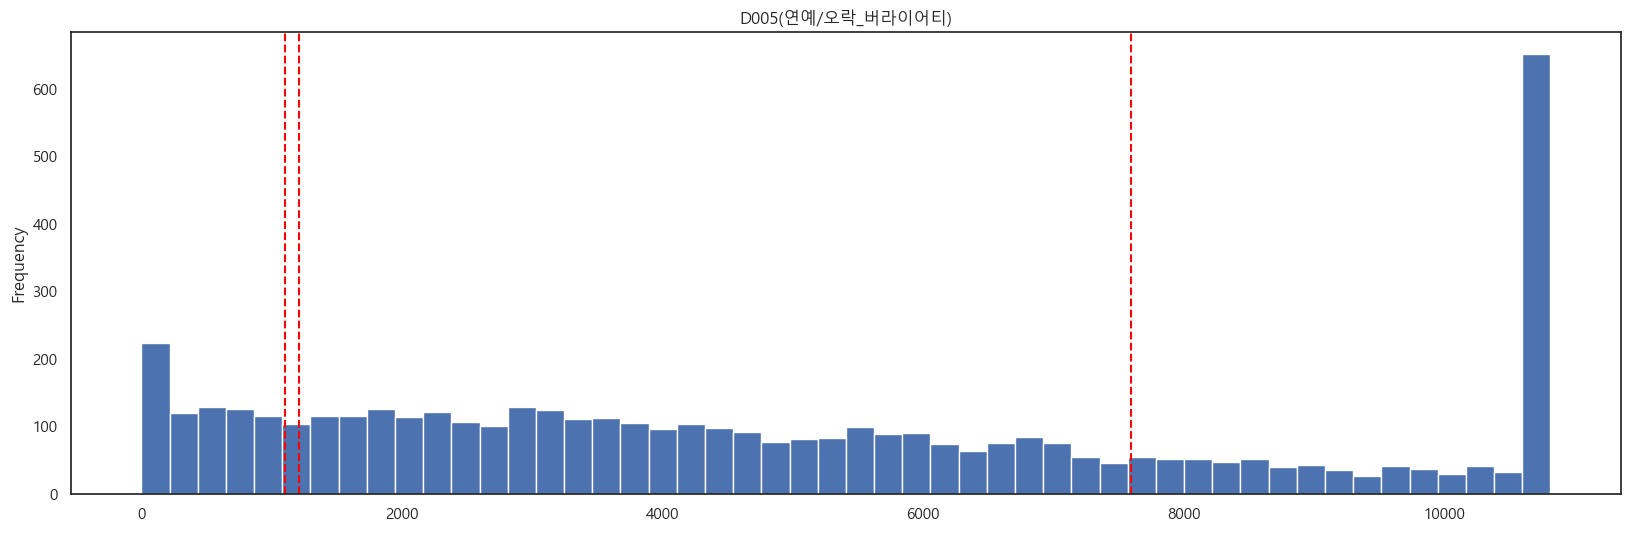

0인 개수: 145
331.3 이하인 개수: 1189
0인 비율: 12.195 %


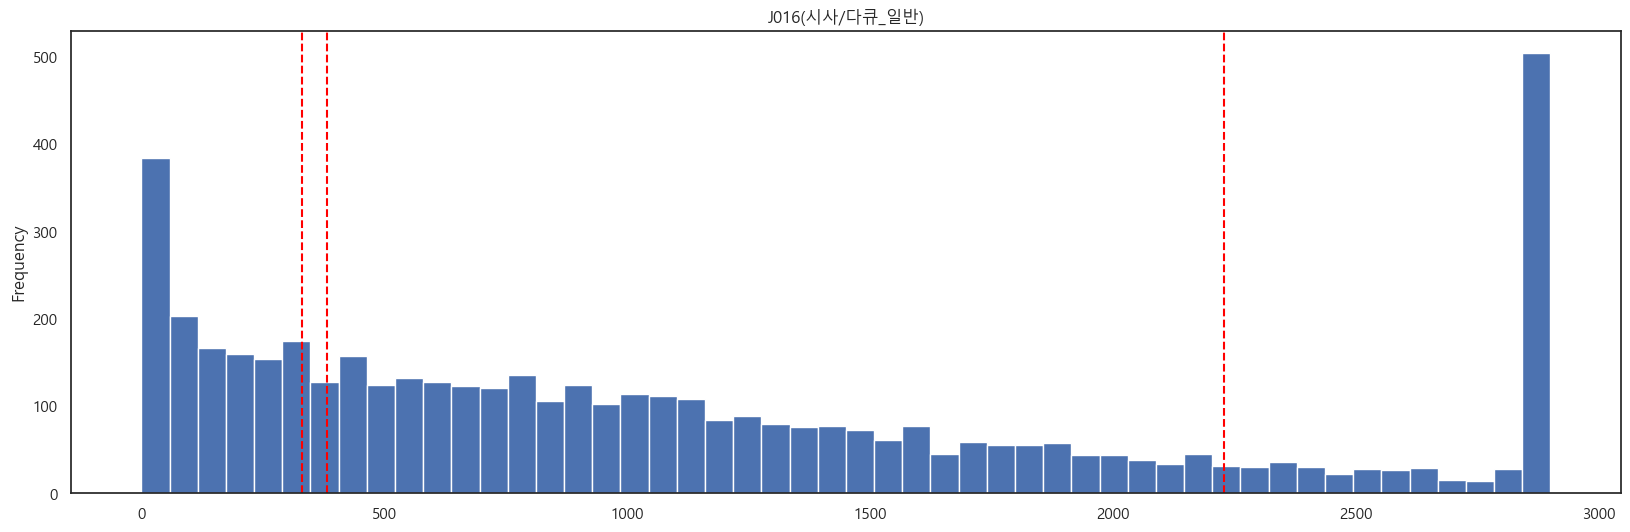

0인 개수: 101
215.65 이하인 개수: 541
0인 비율: 18.669 %


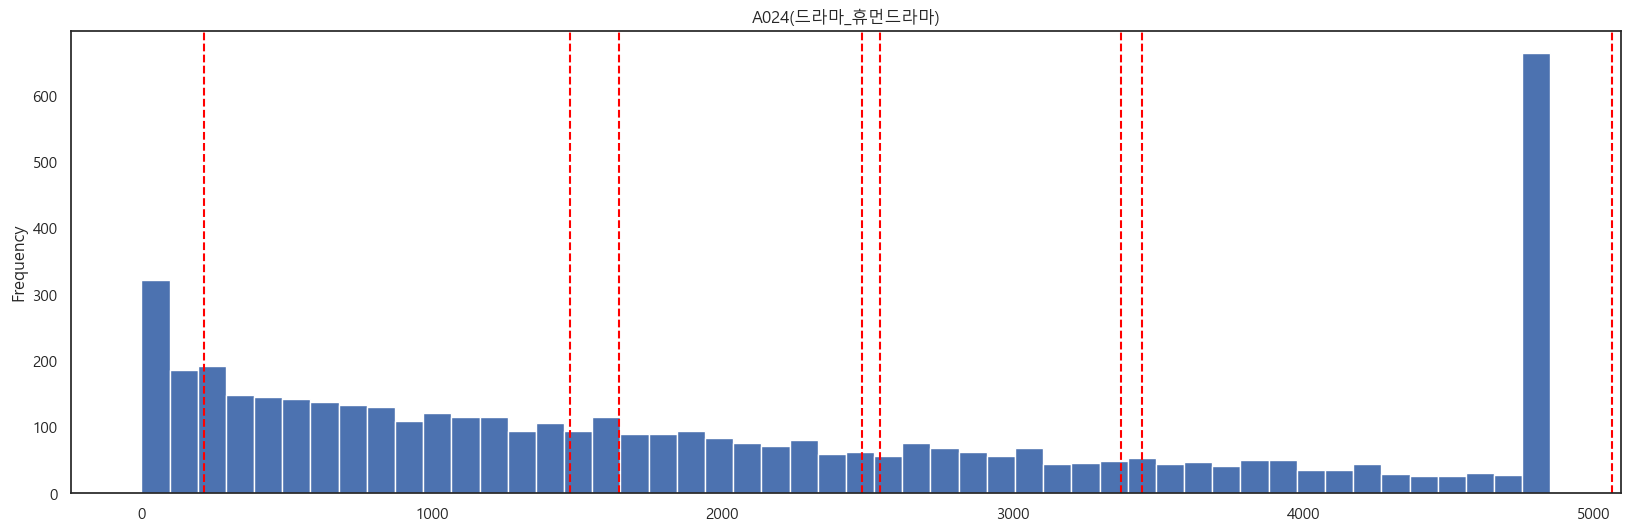

0인 개수: 1621
35.15 이하인 개수: 2822
0인 비율: 57.442 %


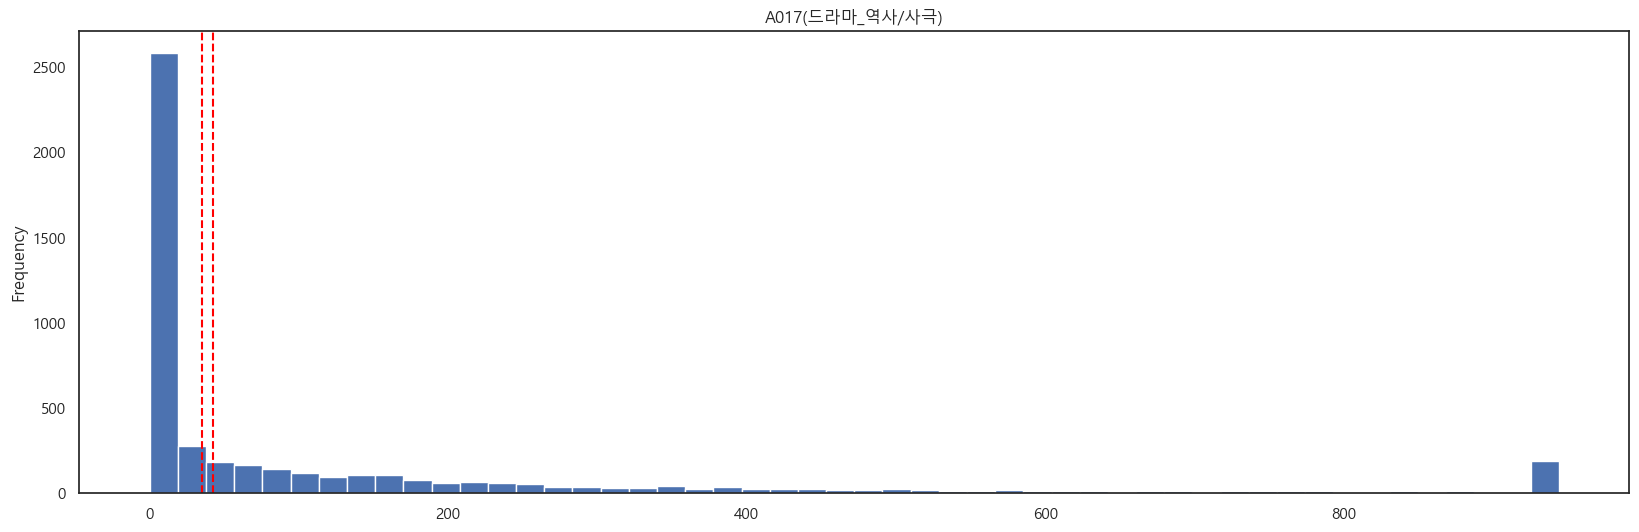

0인 개수: 3686
0.25 이하인 개수: 3686
0인 비율: 100.000 %


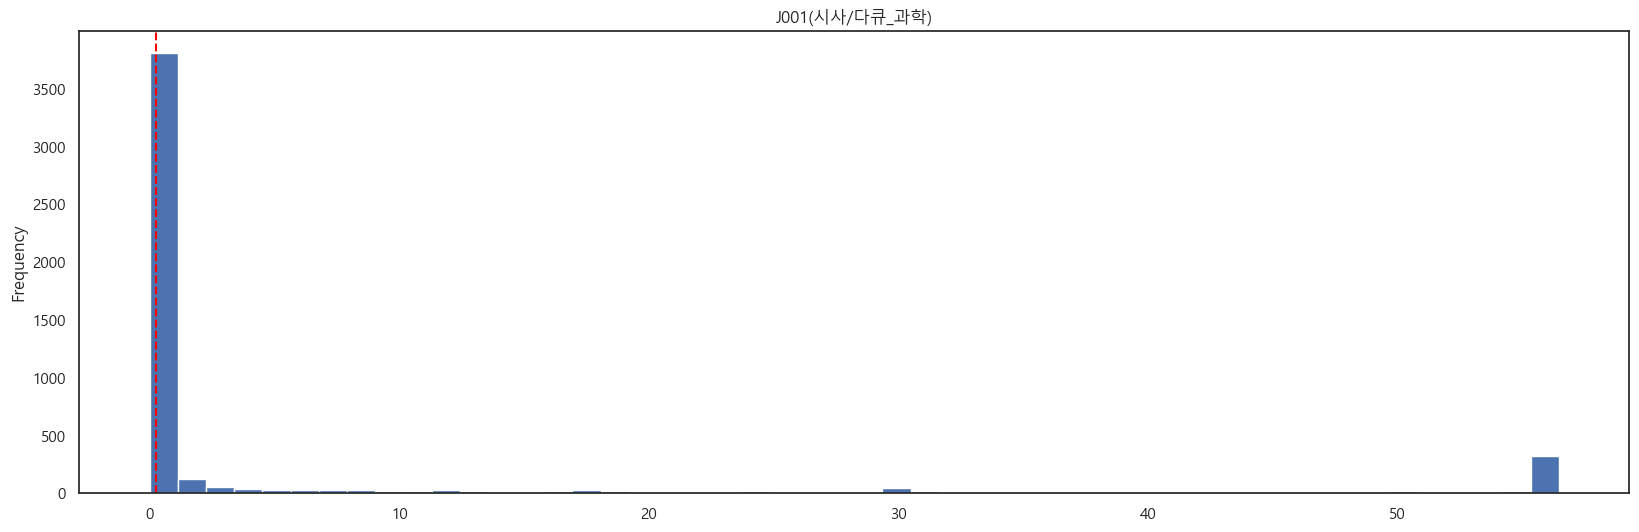

0인 개수: 2278
0.25 이하인 개수: 2278
0인 비율: 100.000 %


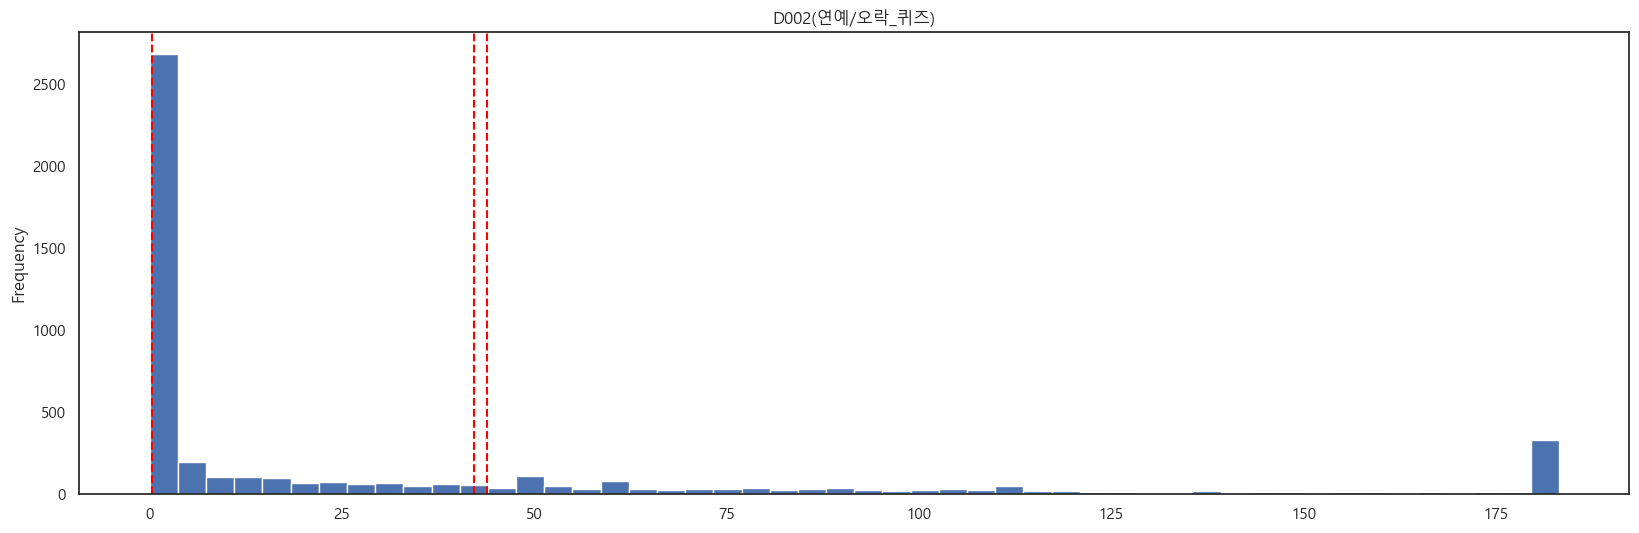

0인 개수: 4137
0.3 이하인 개수: 4137
0인 비율: 100.000 %


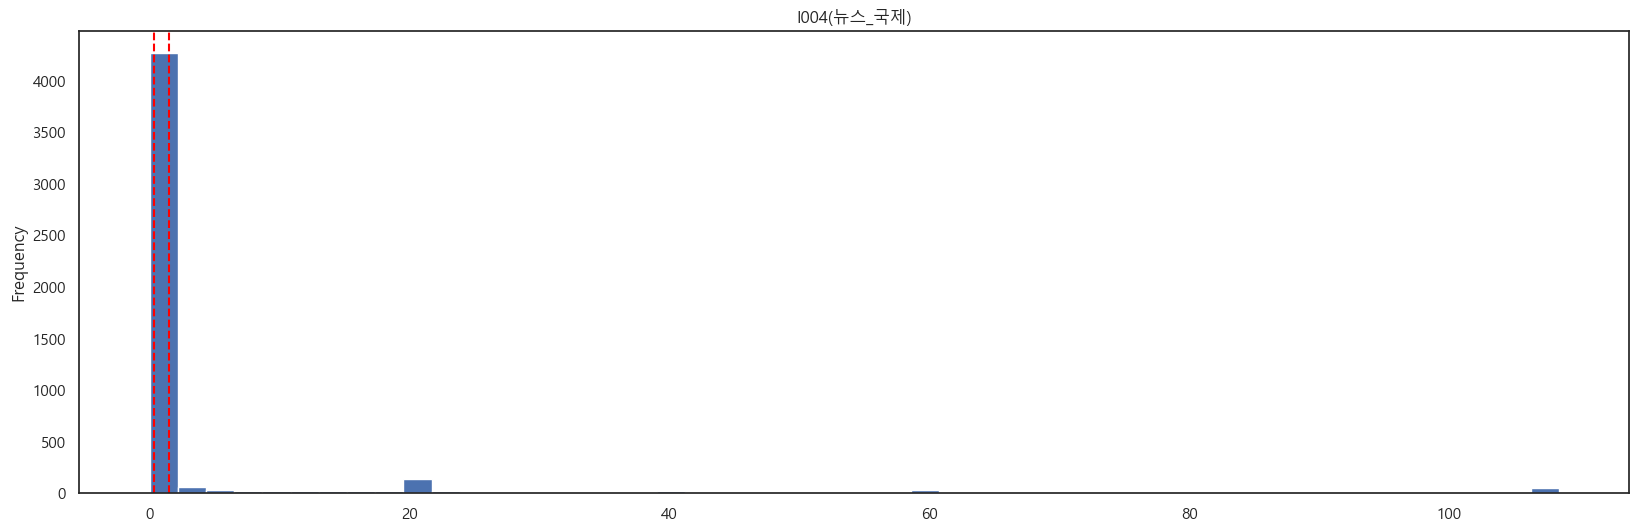

0인 개수: 526
0.75 이하인 개수: 561
0인 비율: 93.761 %


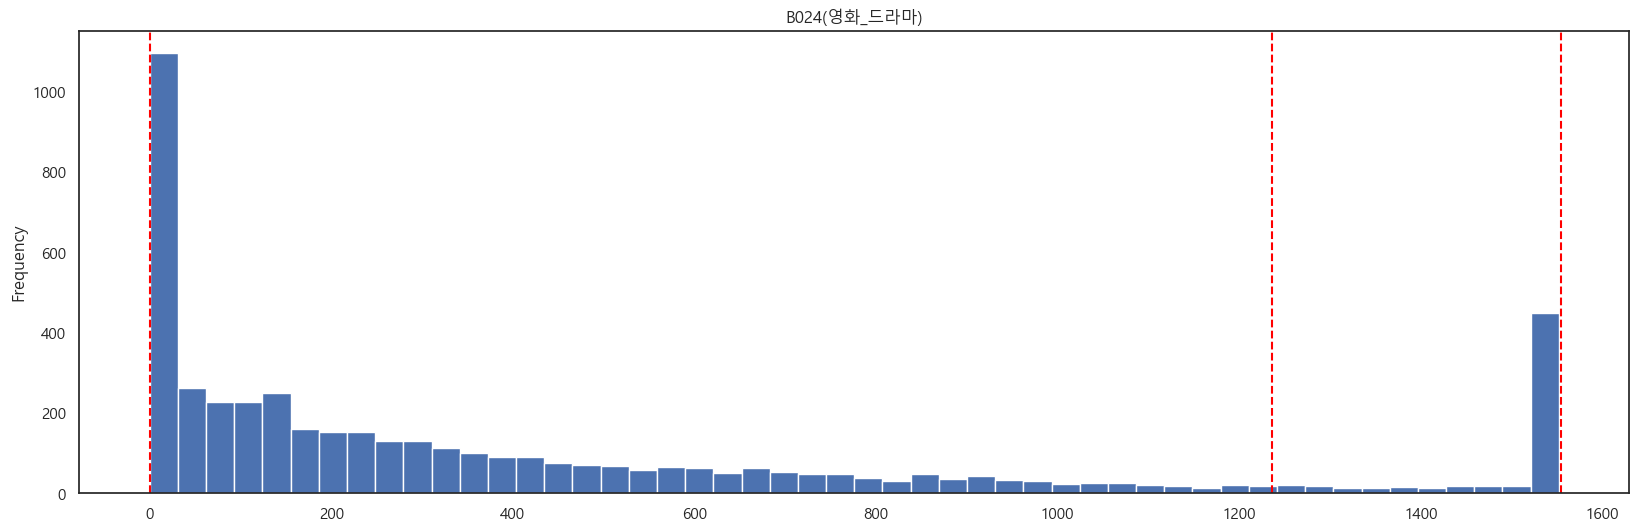

0인 개수: 3330
20.45 이하인 개수: 3939
0인 비율: 84.539 %


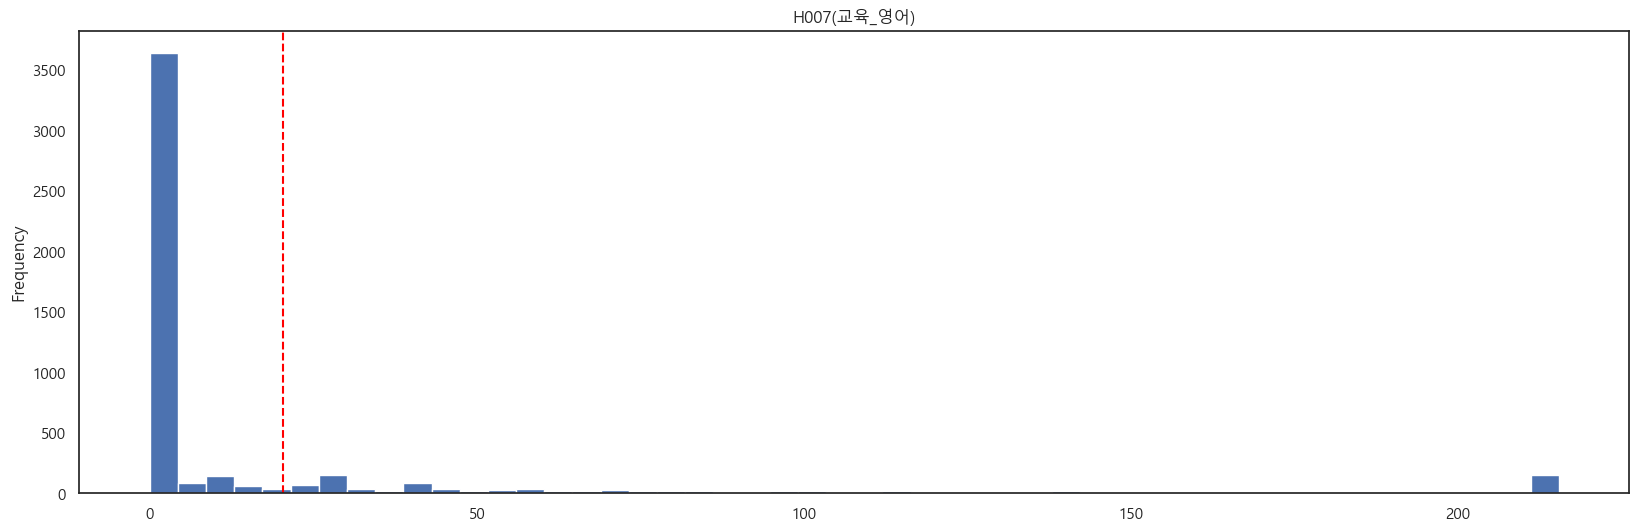

0인 개수: 1399
1.5 이하인 개수: 1553
0인 비율: 90.084 %


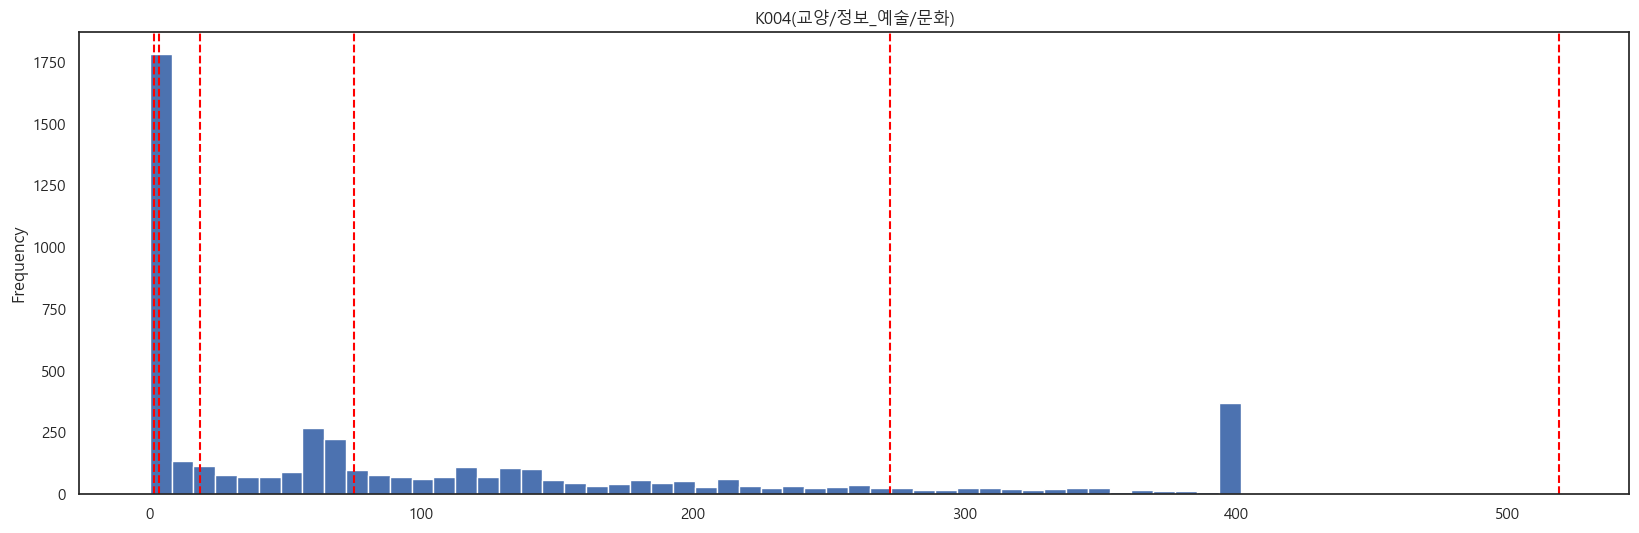

0인 개수: 1167
0.8 이하인 개수: 1238
0인 비율: 94.265 %


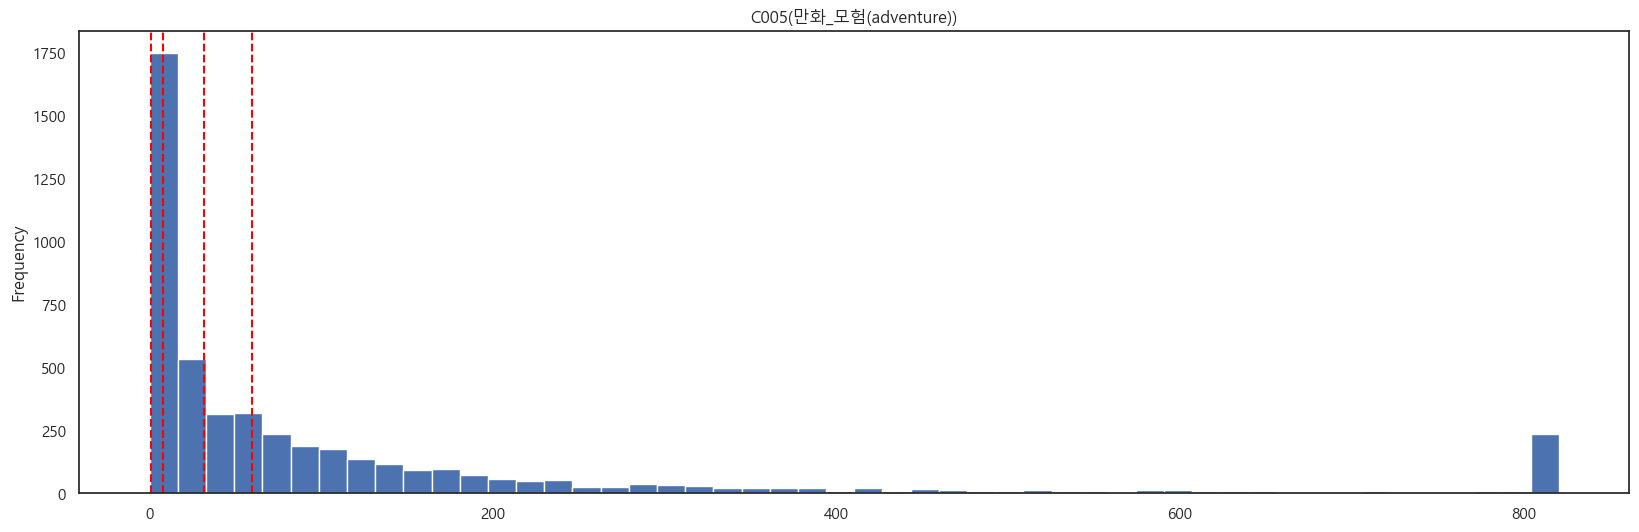

0인 개수: 39
983.988 이하인 개수: 734
0인 비율: 5.313 %


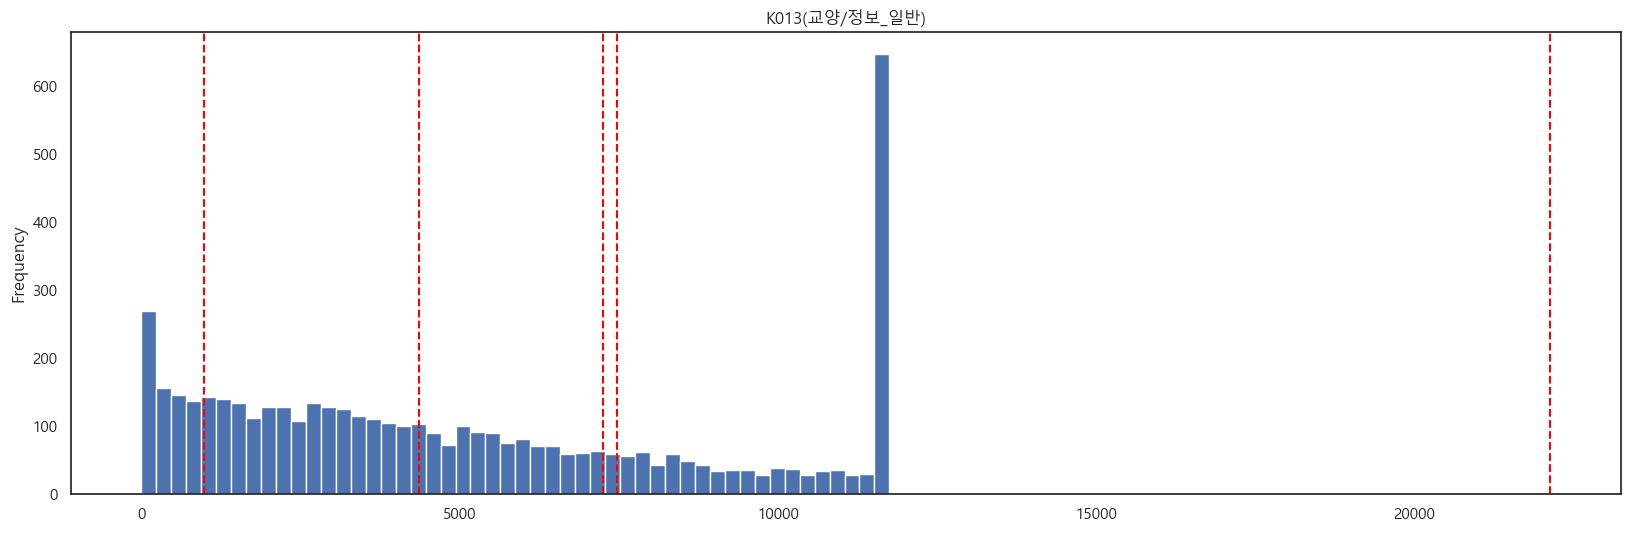

0인 개수: 1422
105.4 이하인 개수: 3763
0인 비율: 37.789 %


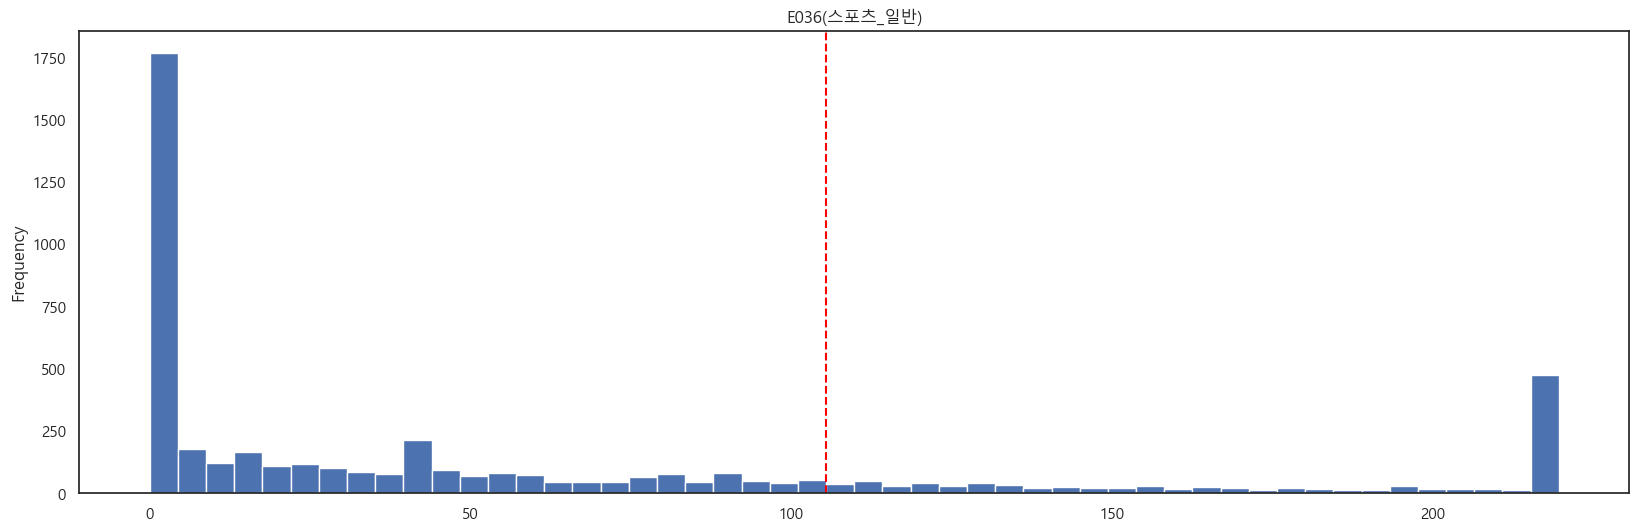

0인 개수: 2553
0.9 이하인 개수: 2694
0인 비율: 94.766 %


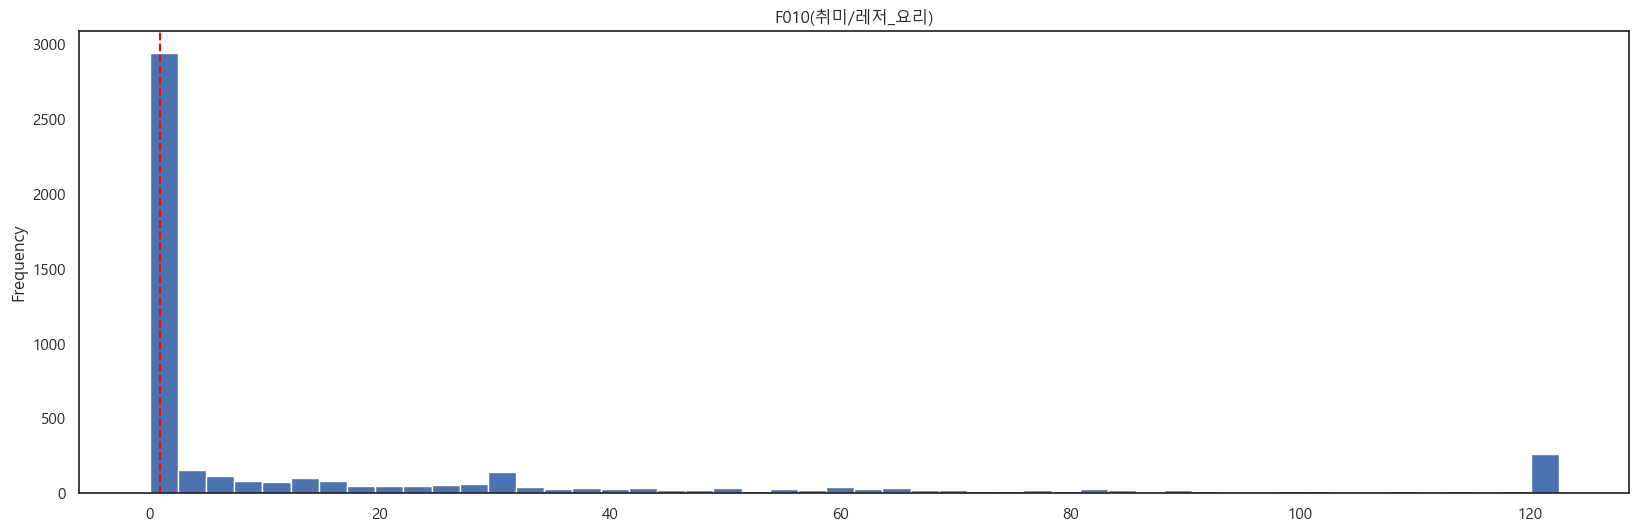

0인 개수: 182
993.9 이하인 개수: 3043
0인 비율: 5.981 %


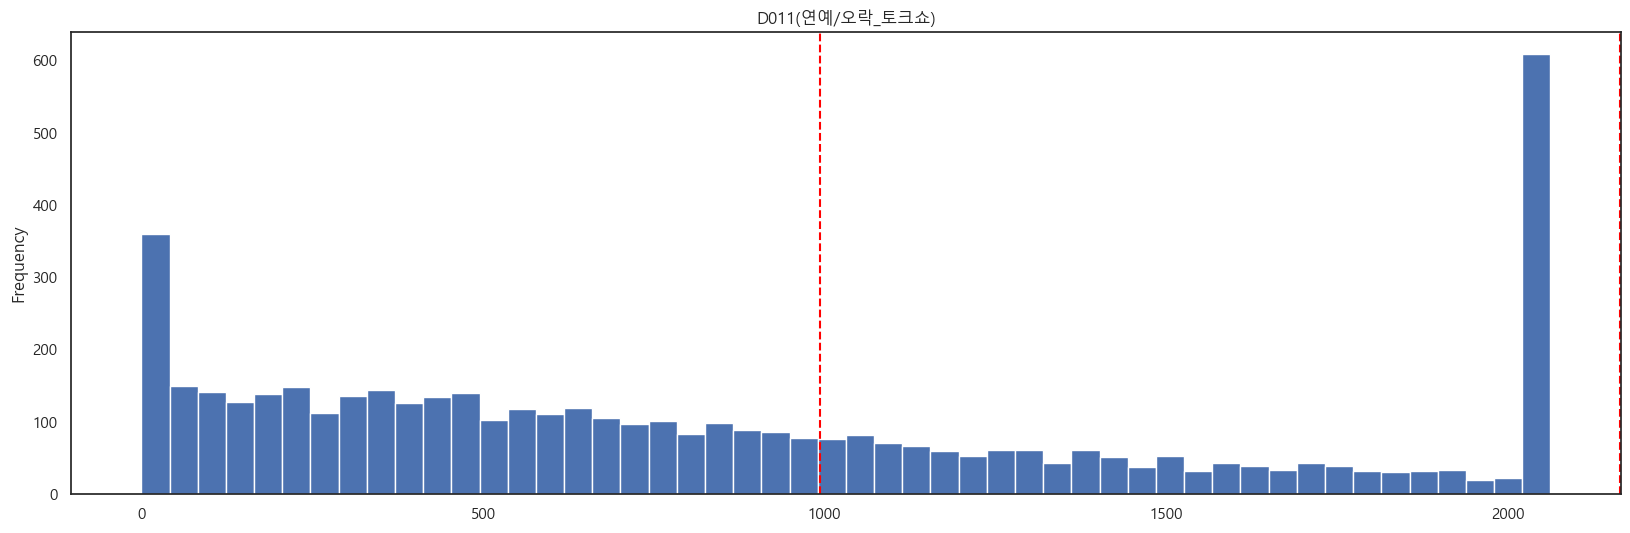

0인 개수: 1271
53.9 이하인 개수: 2726
0인 비율: 46.625 %


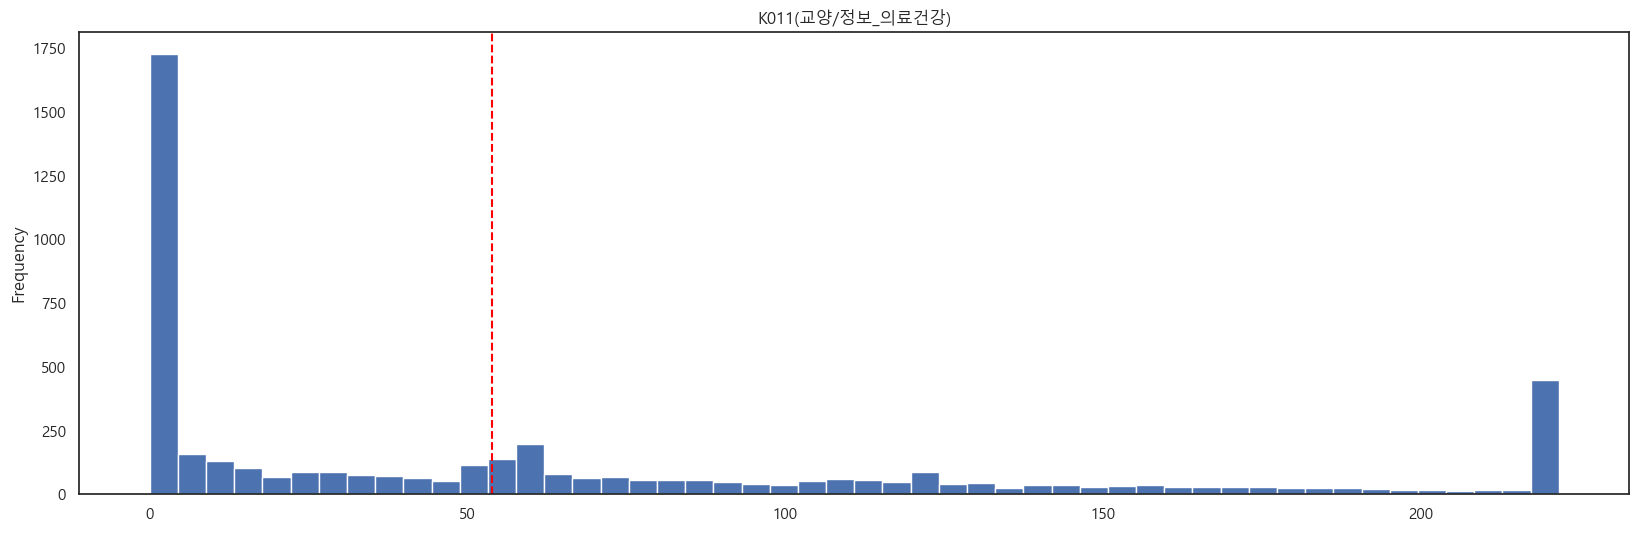

0인 개수: 26
1509.553 이하인 개수: 684
0인 비율: 3.801 %


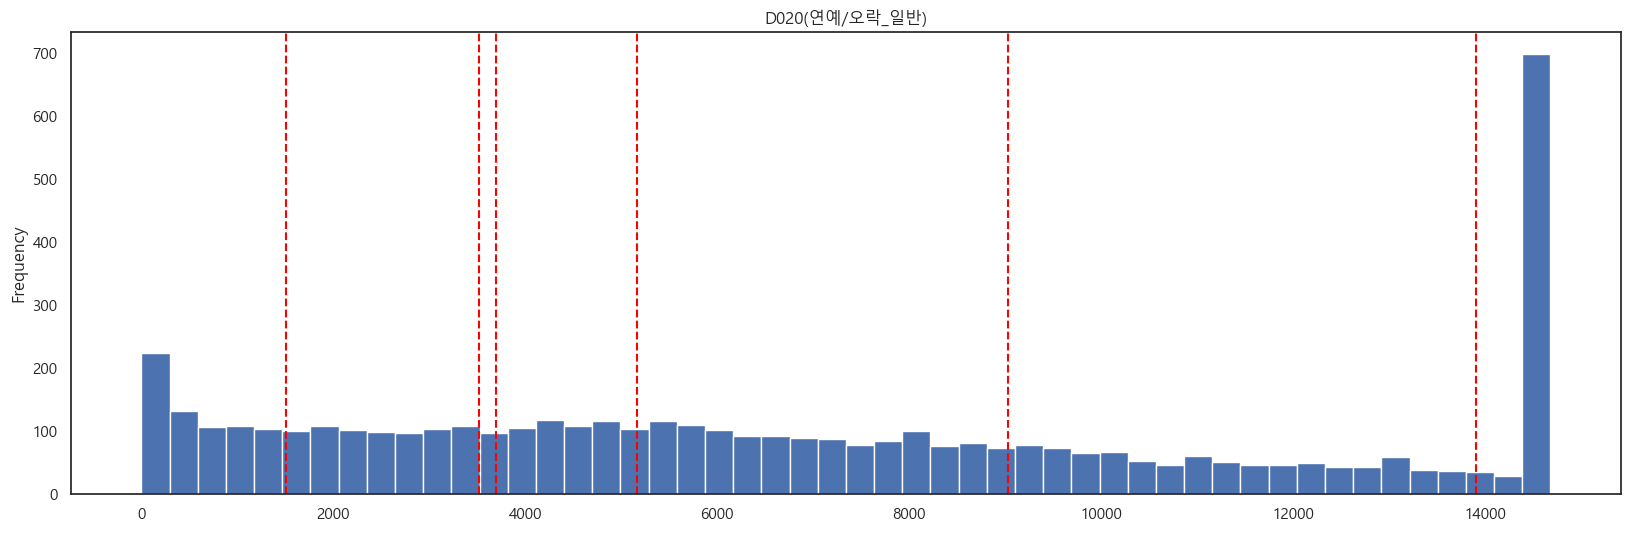

0인 개수: 60
862.248 이하인 개수: 965
0인 비율: 6.218 %


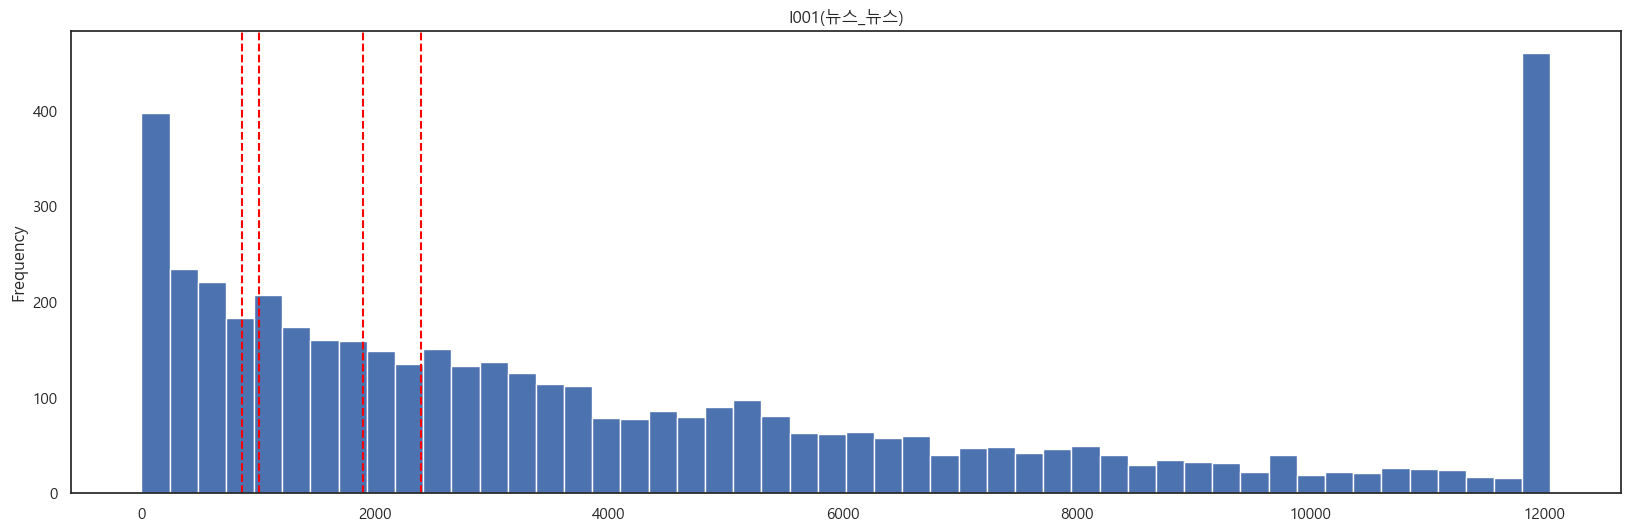

0인 개수: 678
2.05 이하인 개수: 846
0인 비율: 80.142 %


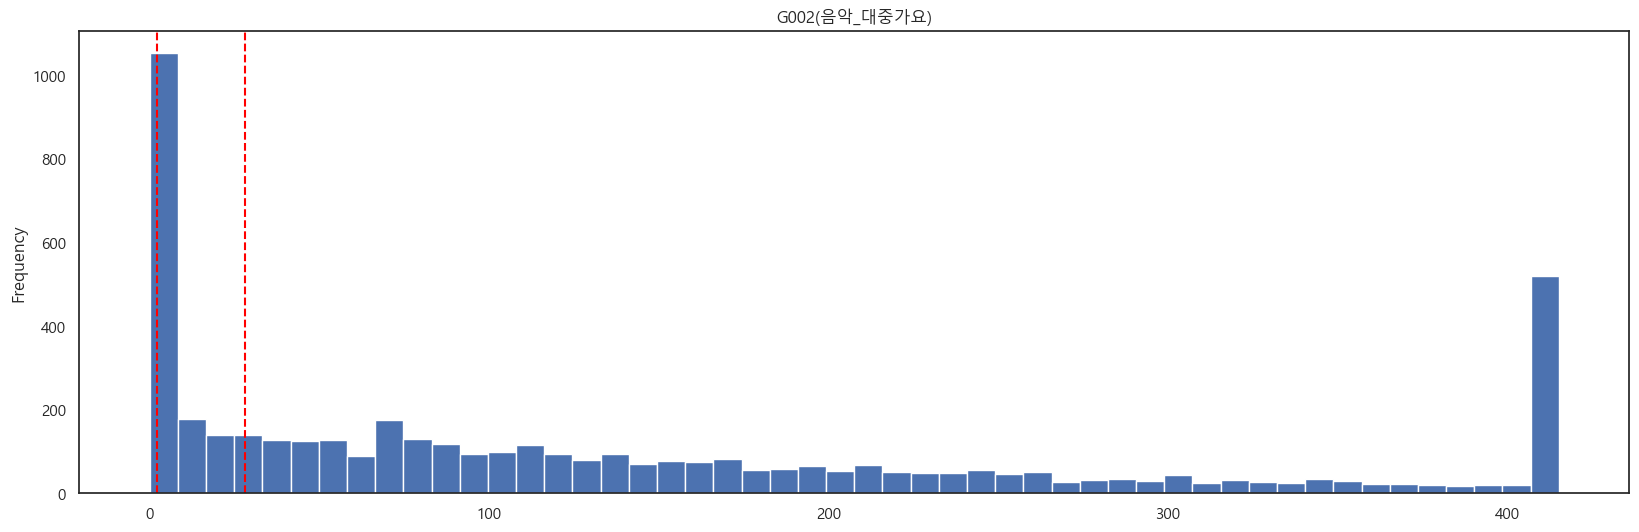

0인 개수: 1752
1.15 이하인 개수: 2039
0인 비율: 85.924 %


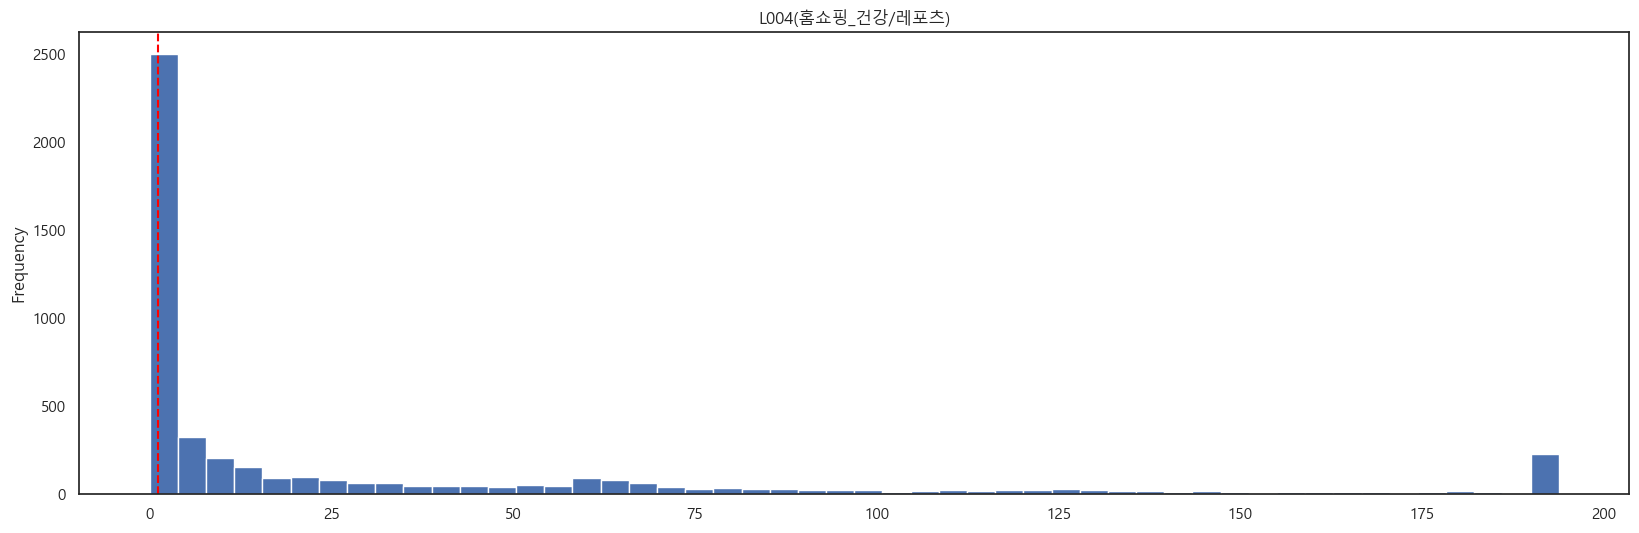

0인 개수: 1070
1.5 이하인 개수: 1235
0인 비율: 86.640 %


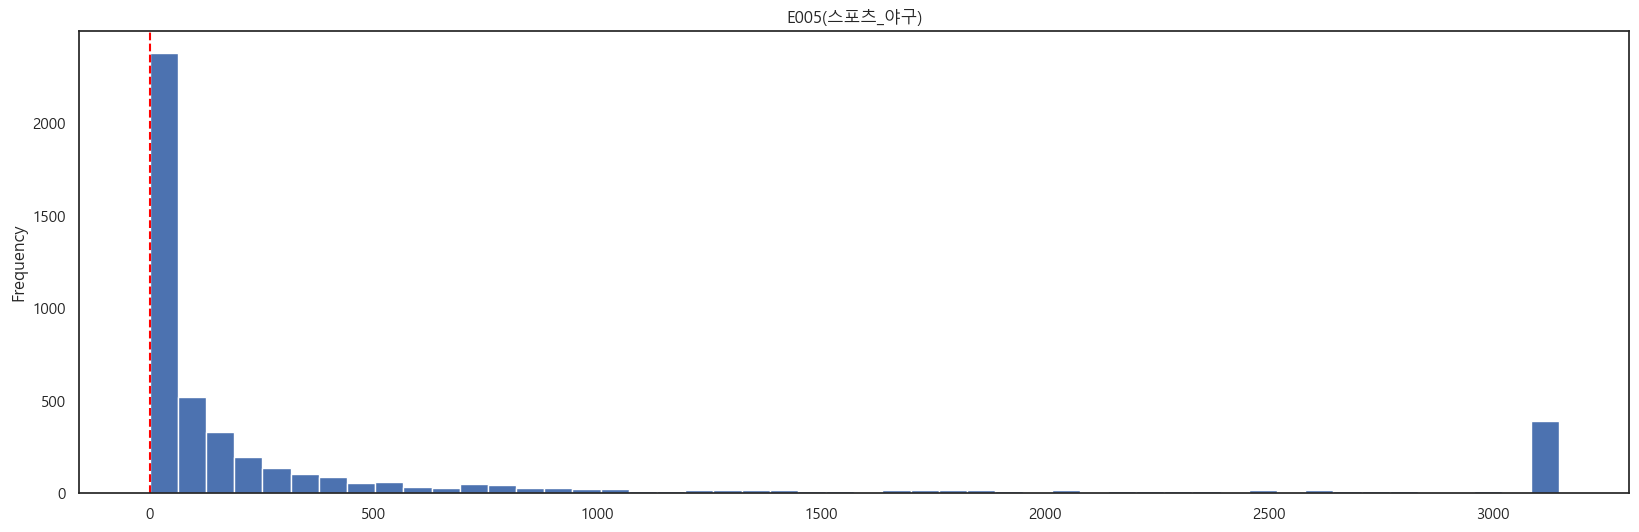

0인 개수: 549
9.35 이하인 개수: 885
0인 비율: 62.034 %


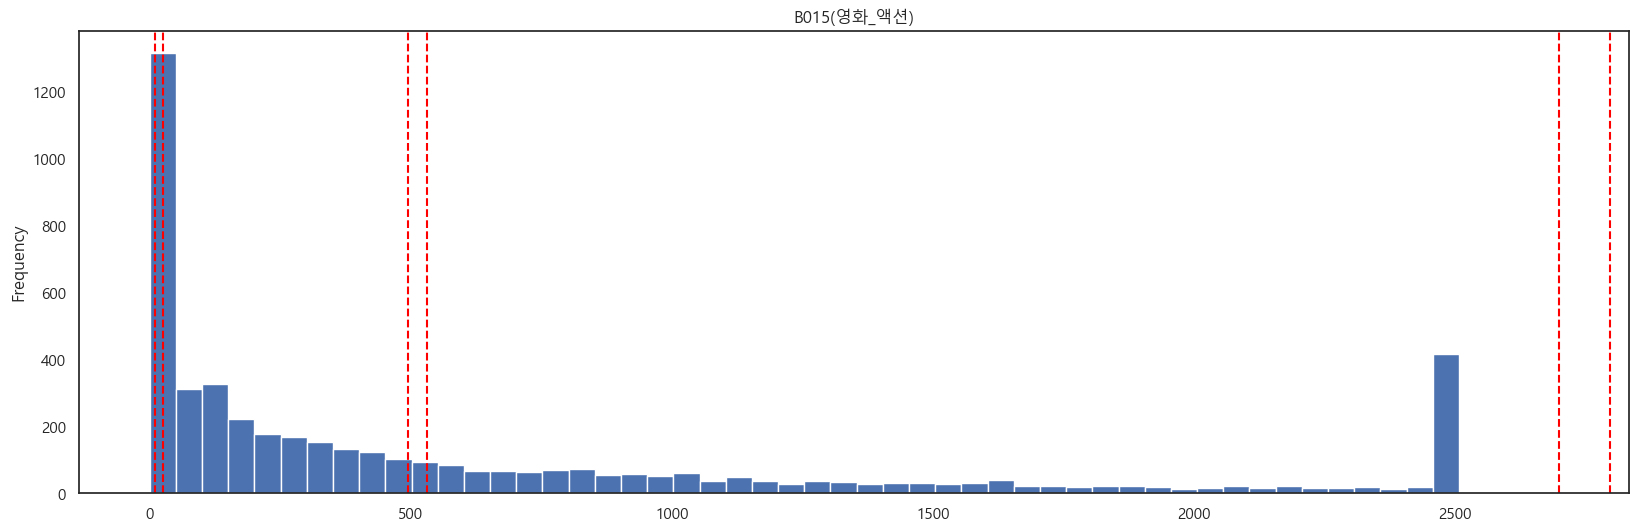

0인 개수: 2042
0.25 이하인 개수: 2042
0인 비율: 100.000 %


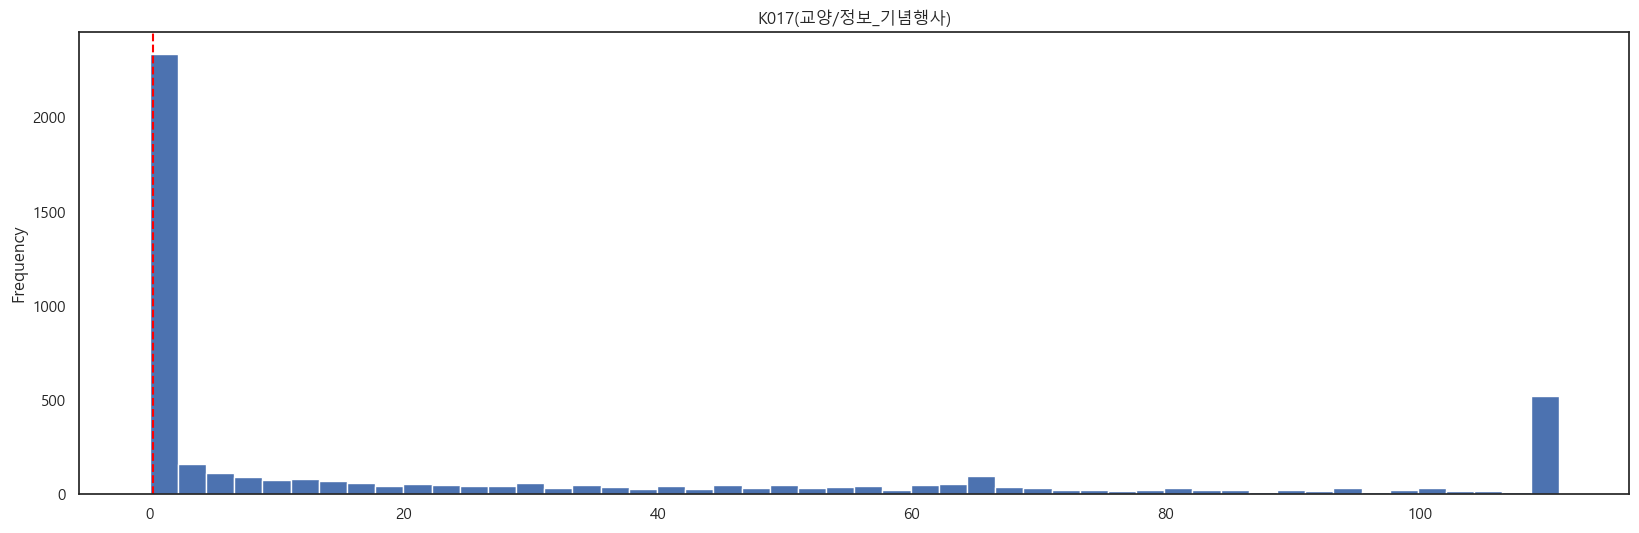

0인 개수: 1317
1831.113 이하인 개수: 4808
0인 비율: 27.392 %


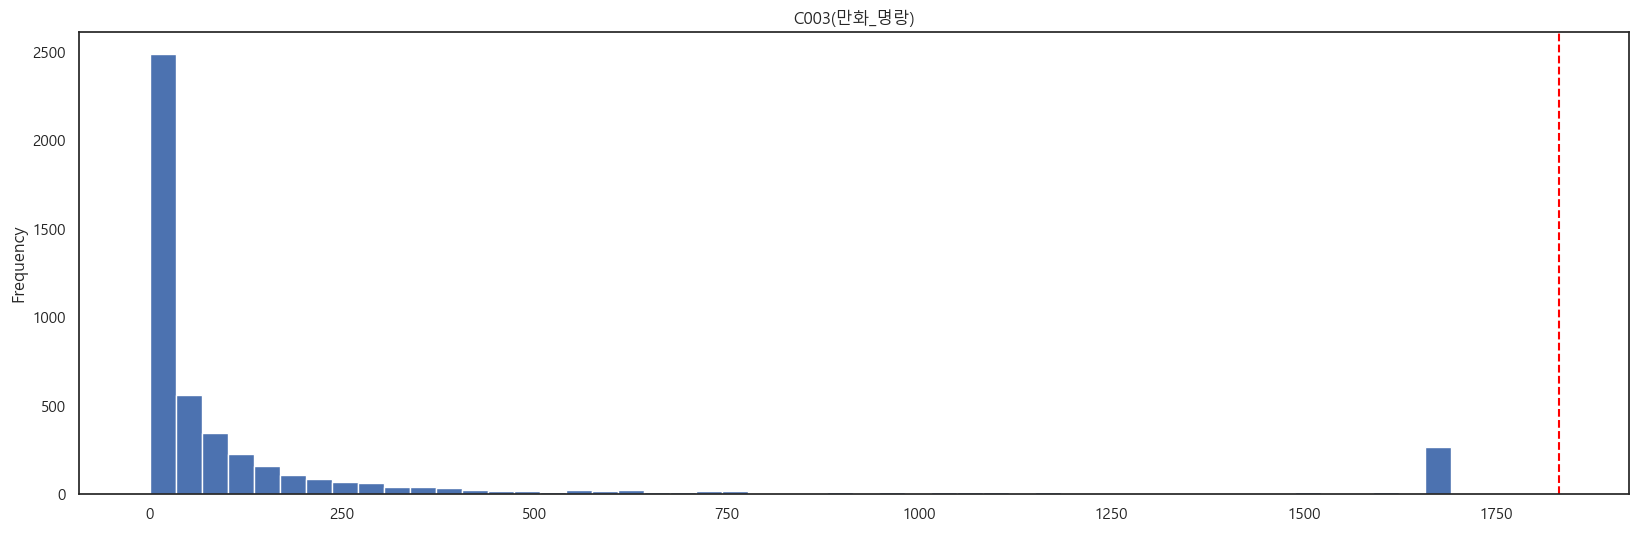

0인 개수: 256
227.8 이하인 개수: 1255
0인 비율: 20.398 %


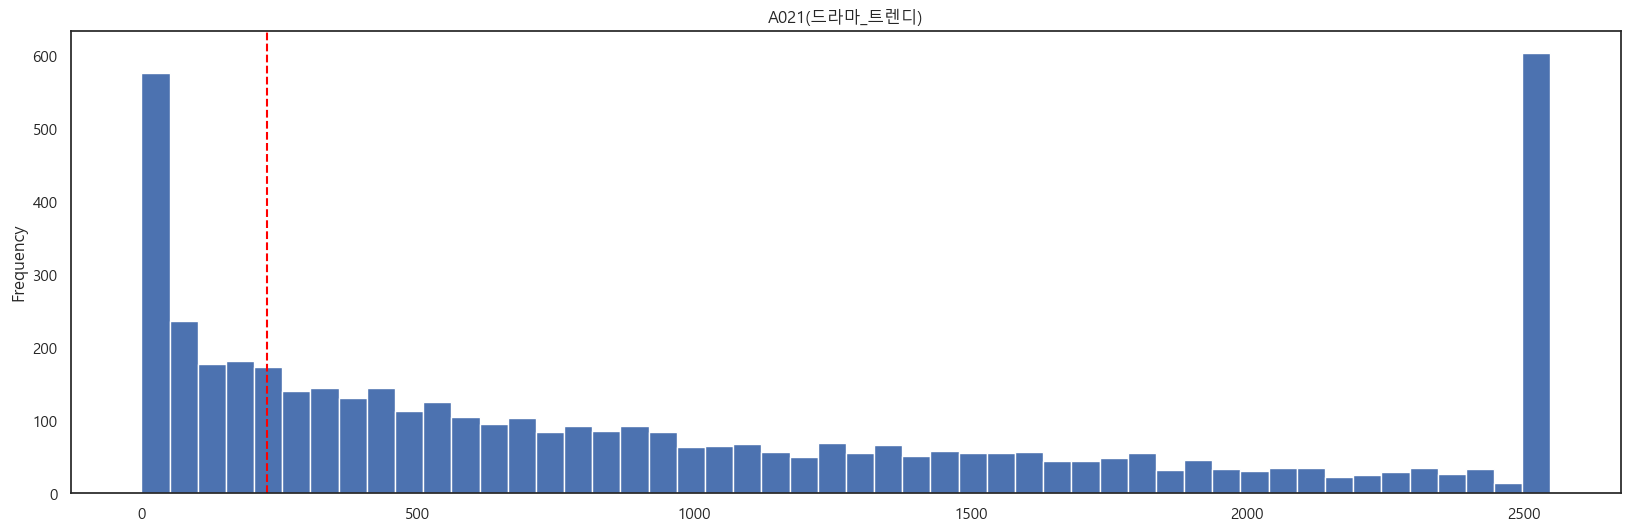

0인 개수: 200
1081.9 이하인 개수: 2946
0인 비율: 6.789 %


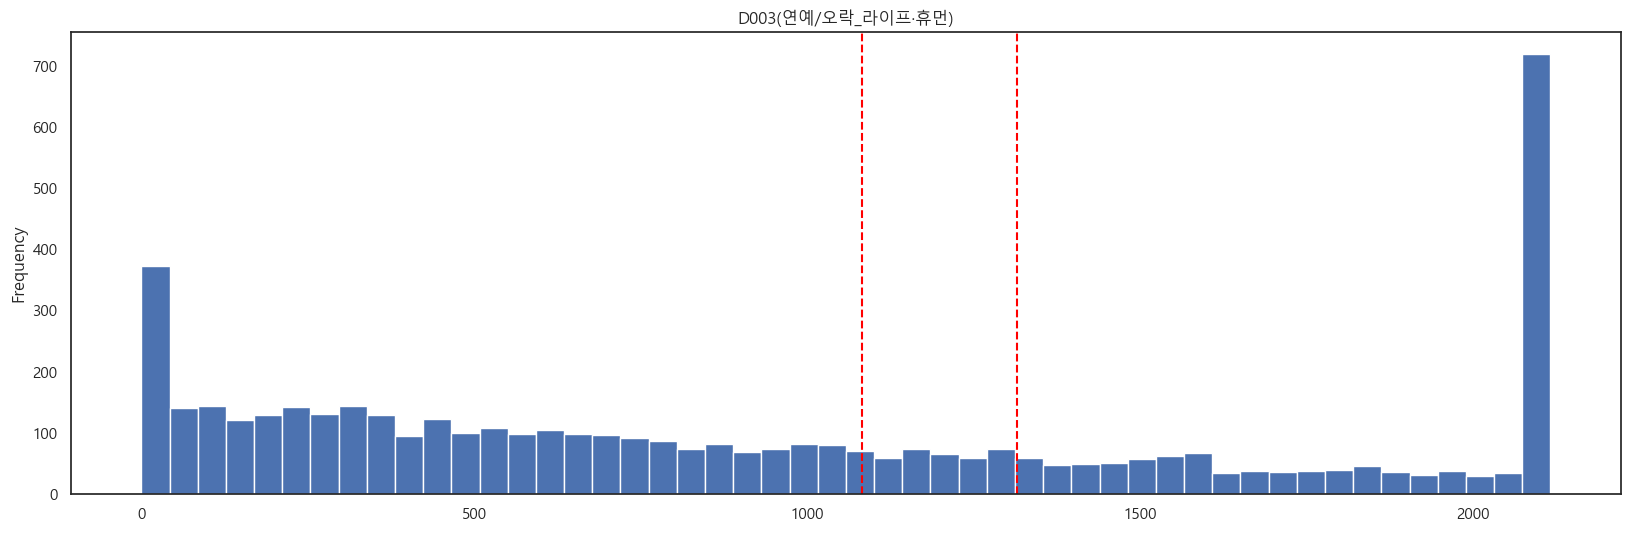

0인 개수: 2237
1.6 이하인 개수: 2518
0인 비율: 88.840 %


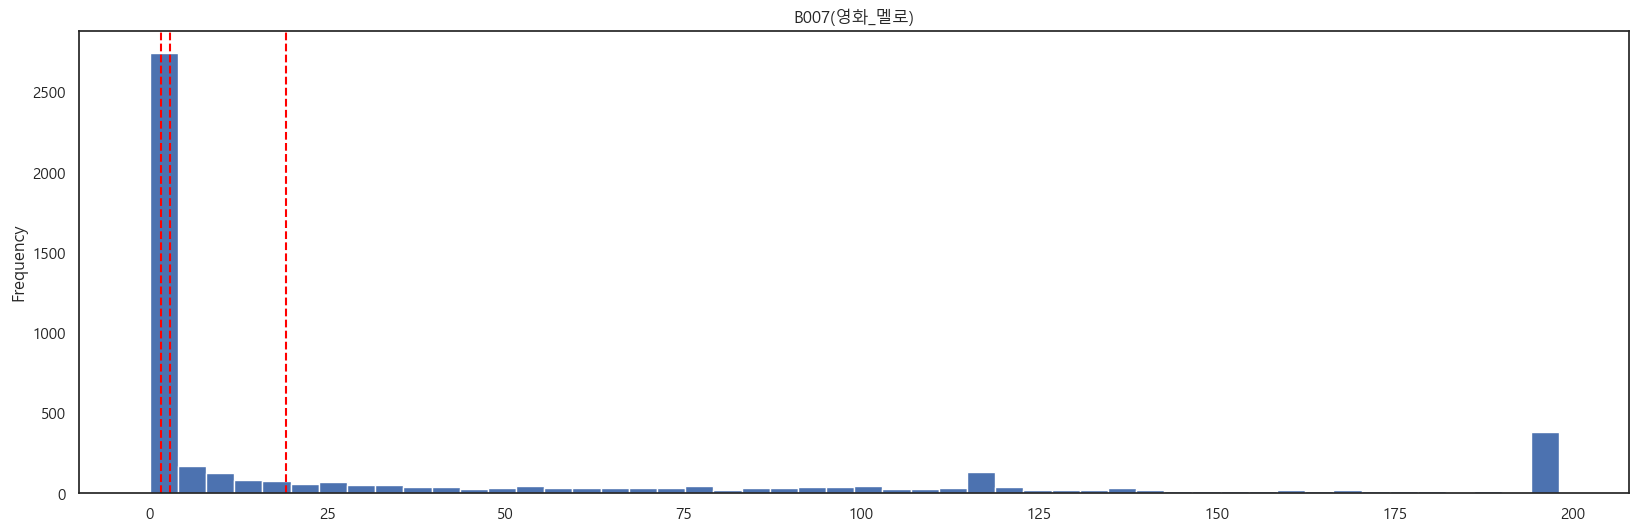

0인 개수: 2572
2.75 이하인 개수: 2950
0인 비율: 87.186 %


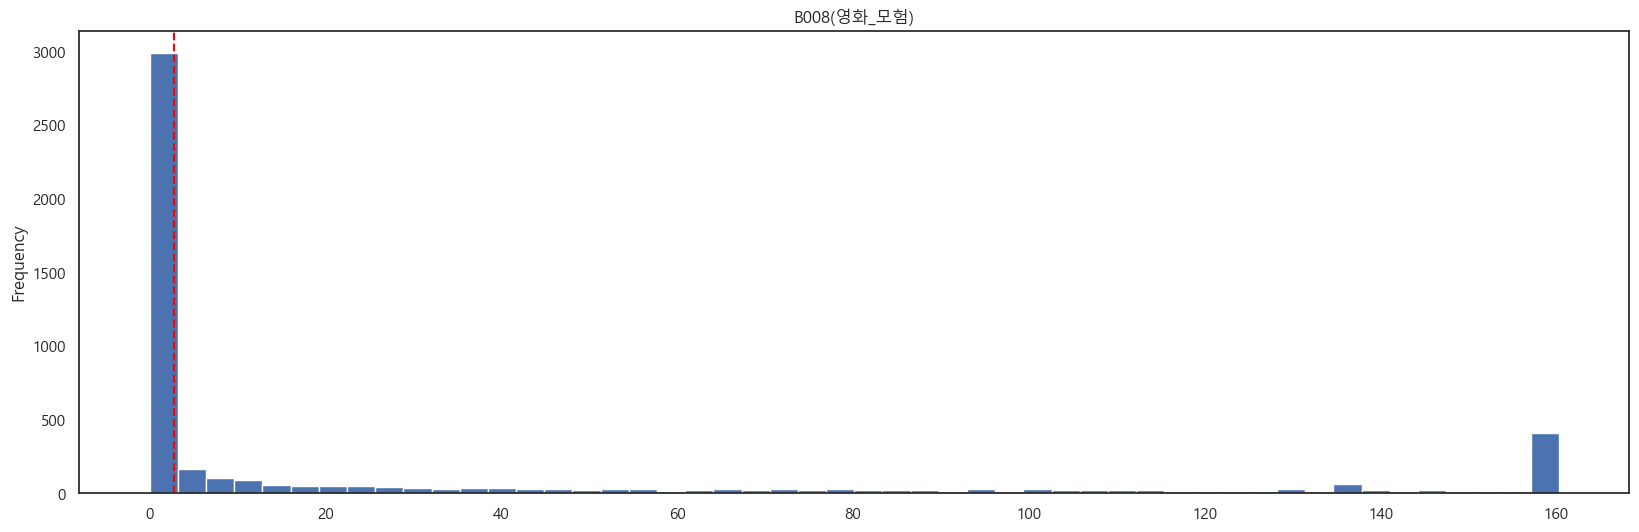

0인 개수: 364
160.65 이하인 개수: 1565
0인 비율: 23.259 %


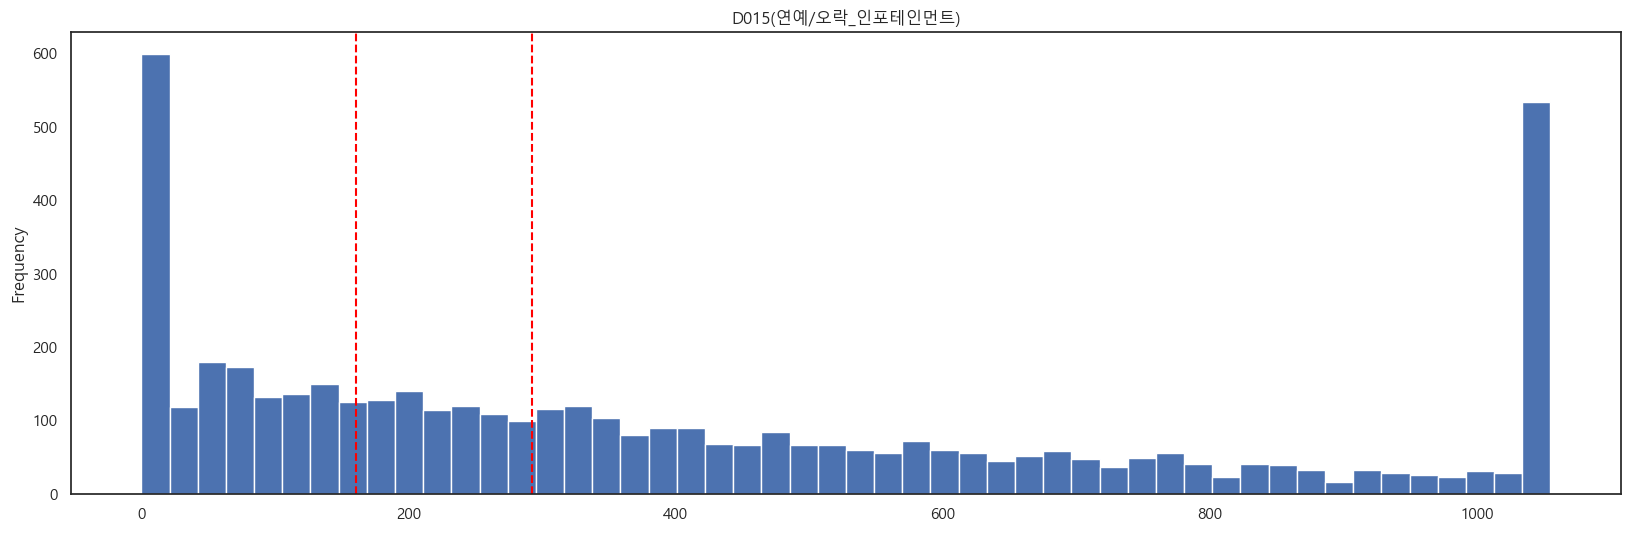

0인 개수: 1957
1.25 이하인 개수: 2181
0인 비율: 89.729 %


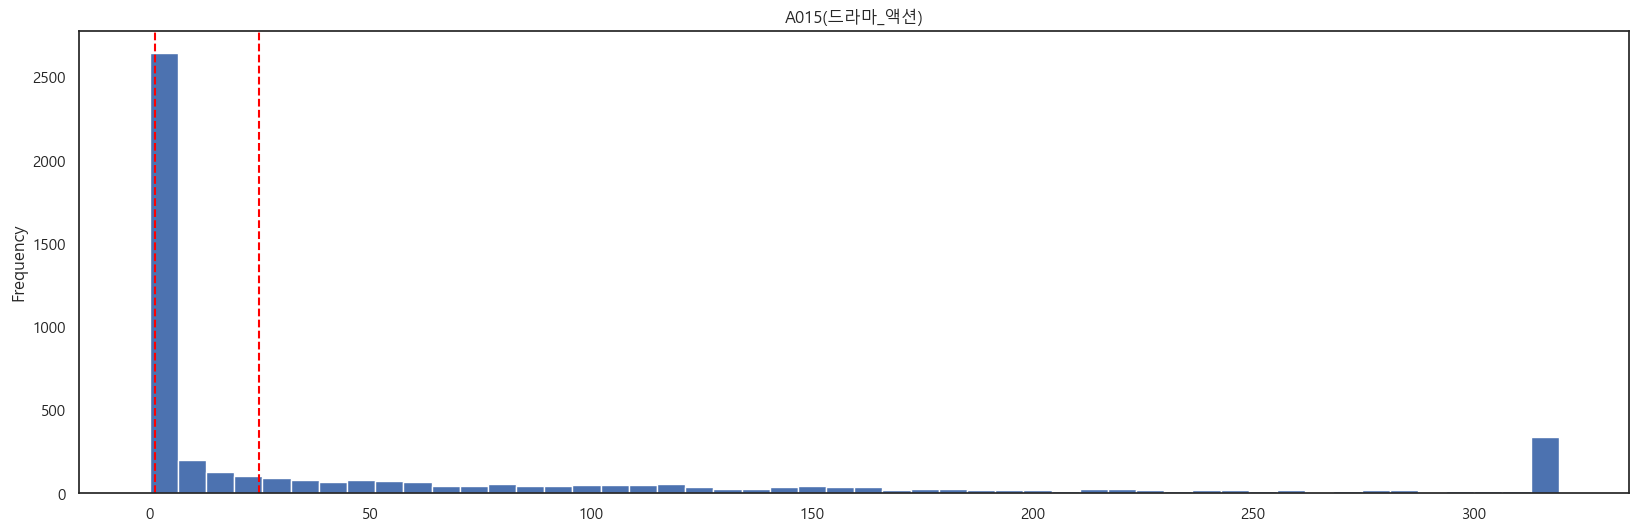

0인 개수: 1375
5.5 이하인 개수: 1842
0인 비율: 74.647 %


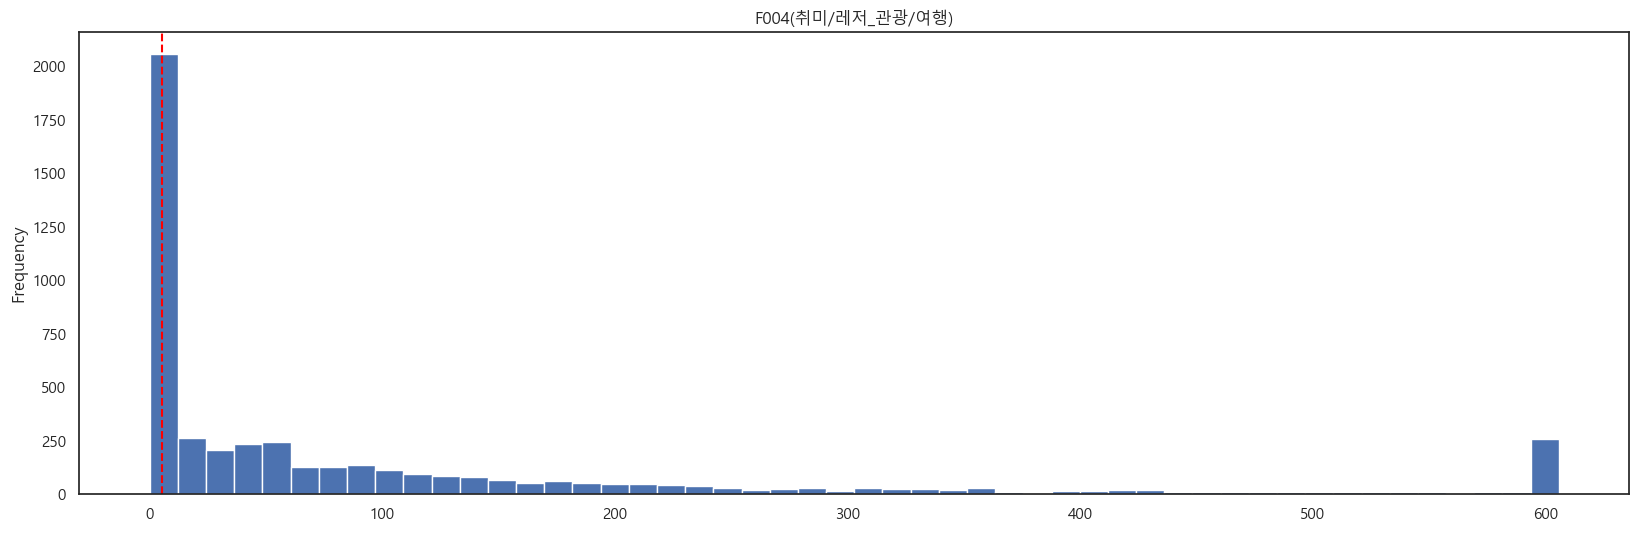

0인 개수: 1132
35.35 이하인 개수: 2672
0인 비율: 42.365 %


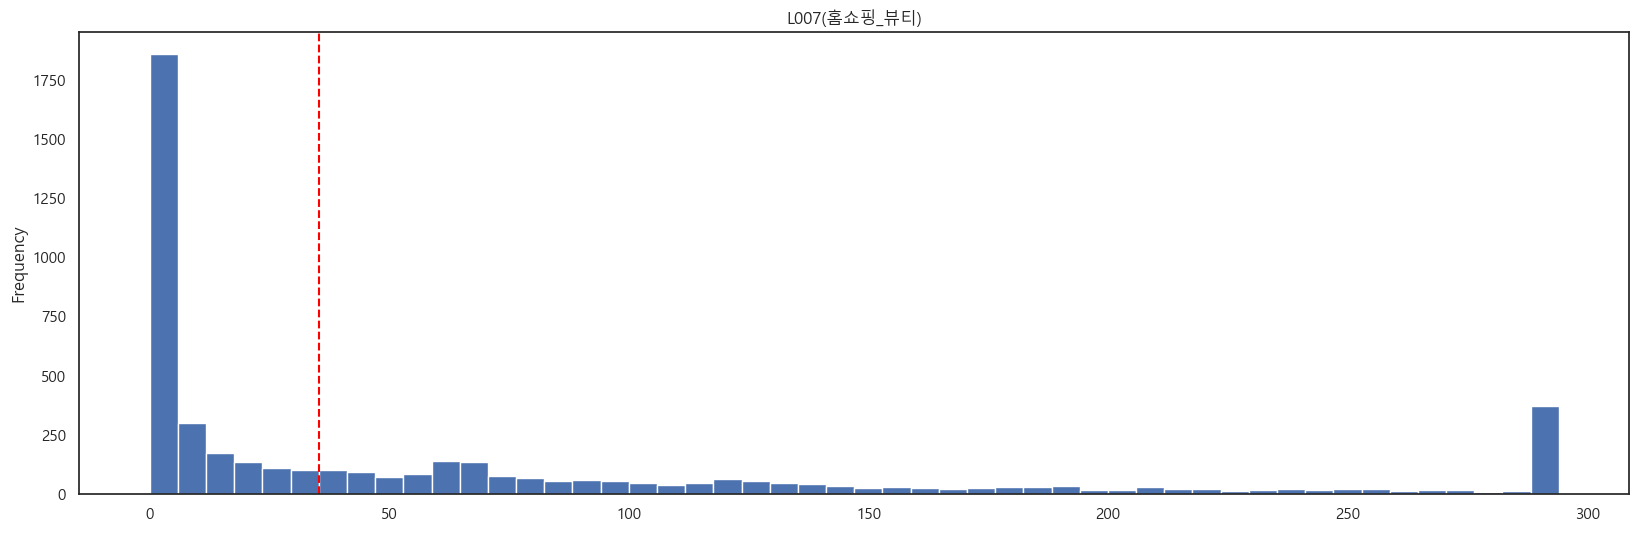

0인 개수: 2236
13.9 이하인 개수: 2754
0인 비율: 81.191 %


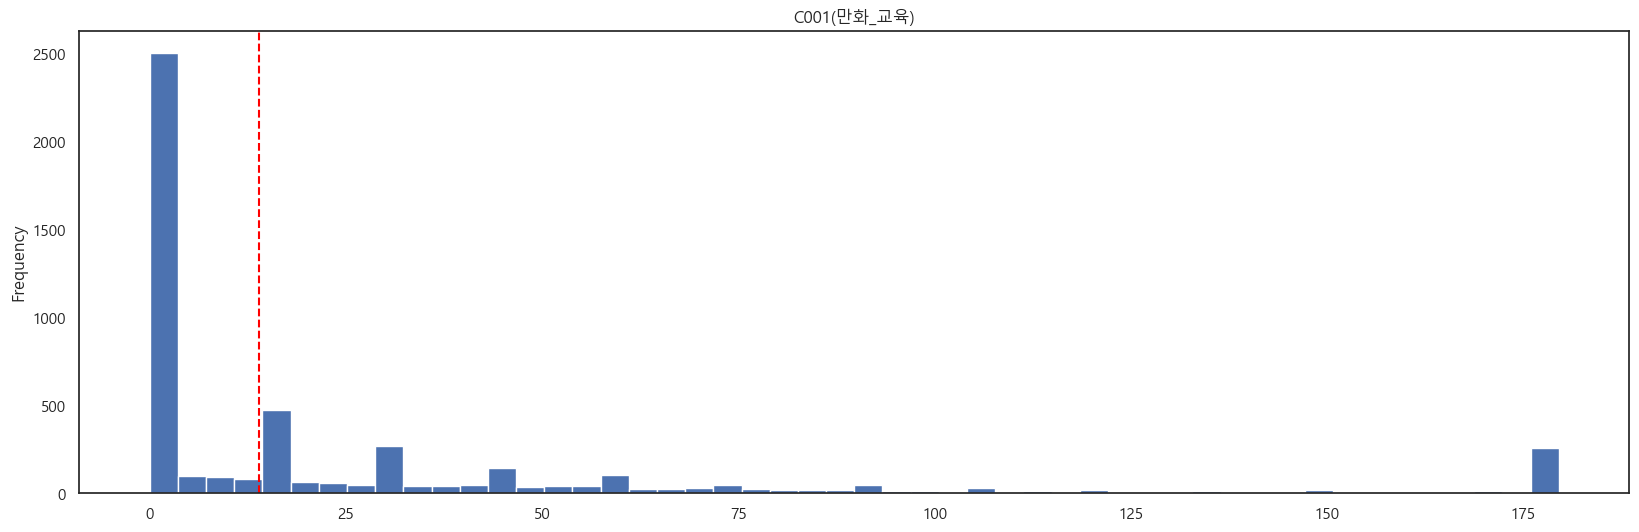

0인 개수: 402
7.9 이하인 개수: 565
0인 비율: 71.150 %


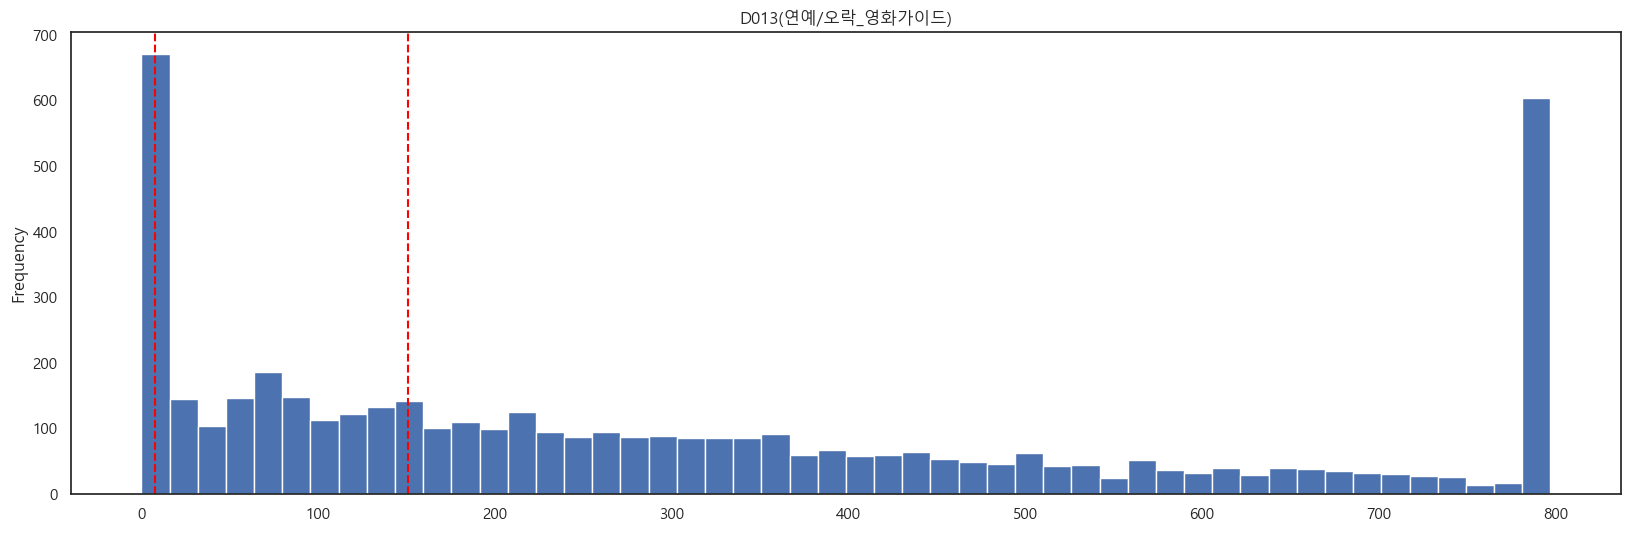

0인 개수: 3051
0.95 이하인 개수: 3224
0인 비율: 94.634 %


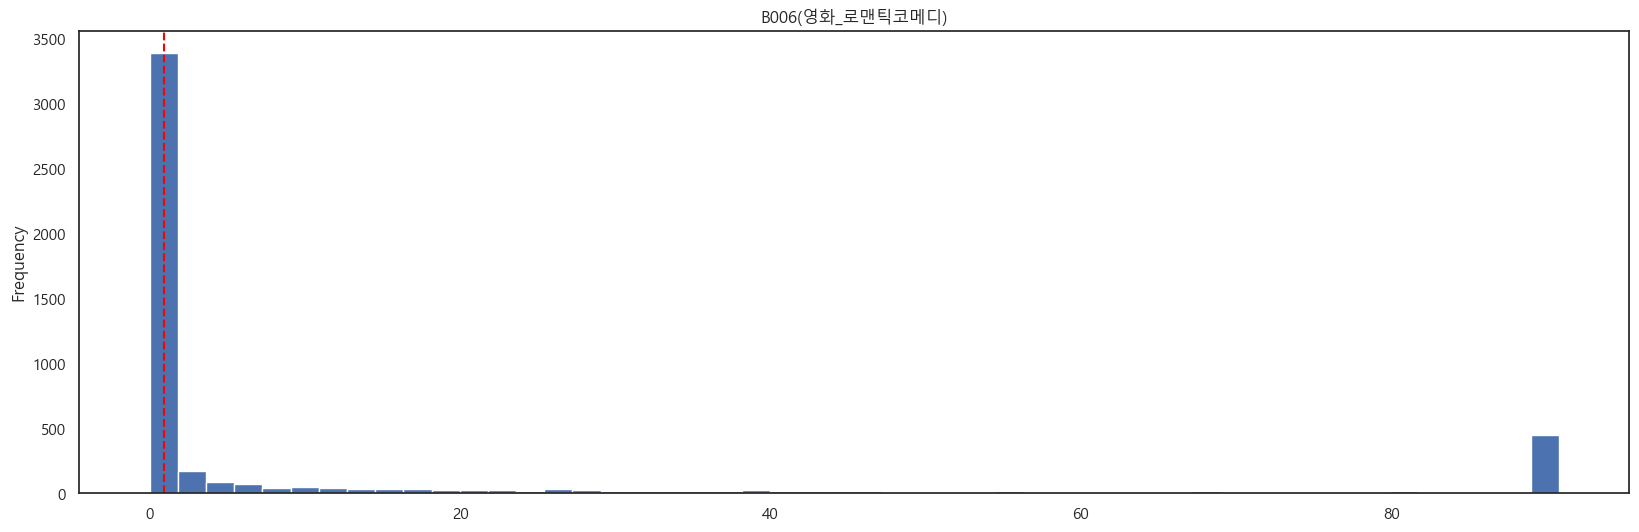

0인 개수: 1232
0.75 이하인 개수: 1326
0인 비율: 92.911 %


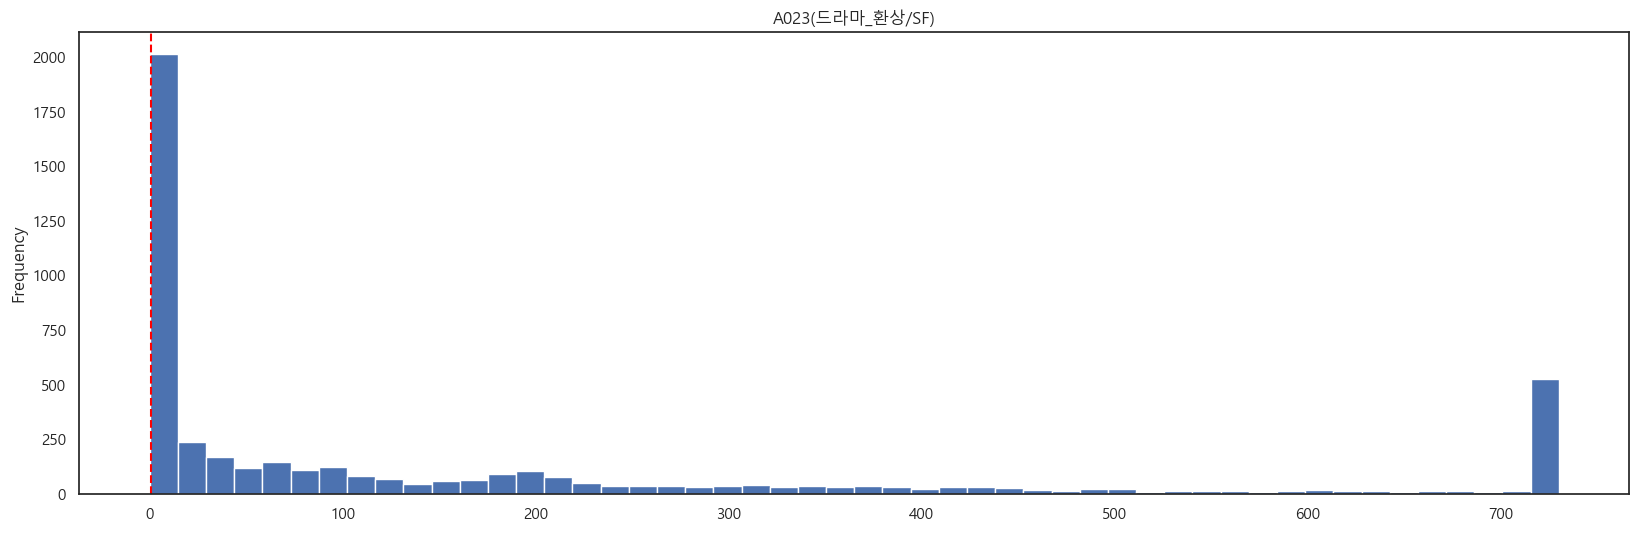

0인 개수: 870
4.35 이하인 개수: 1202
0인 비율: 72.379 %


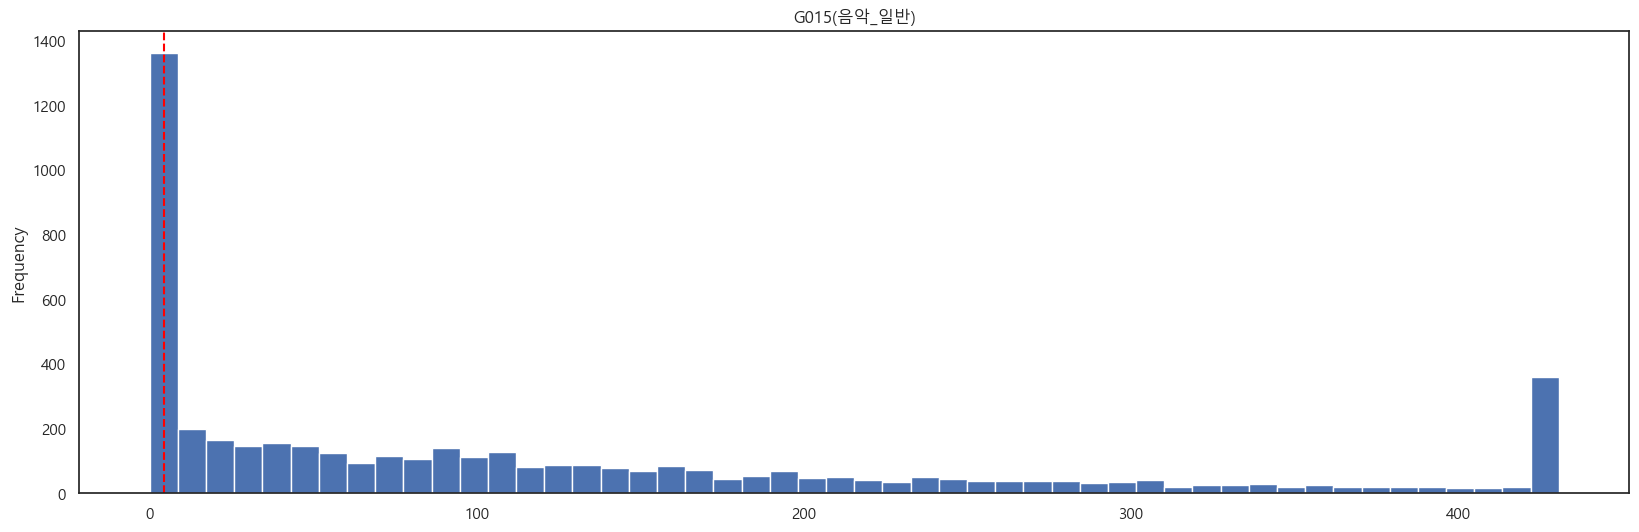

0인 개수: 2287
1.85 이하인 개수: 2546
0인 비율: 89.827 %


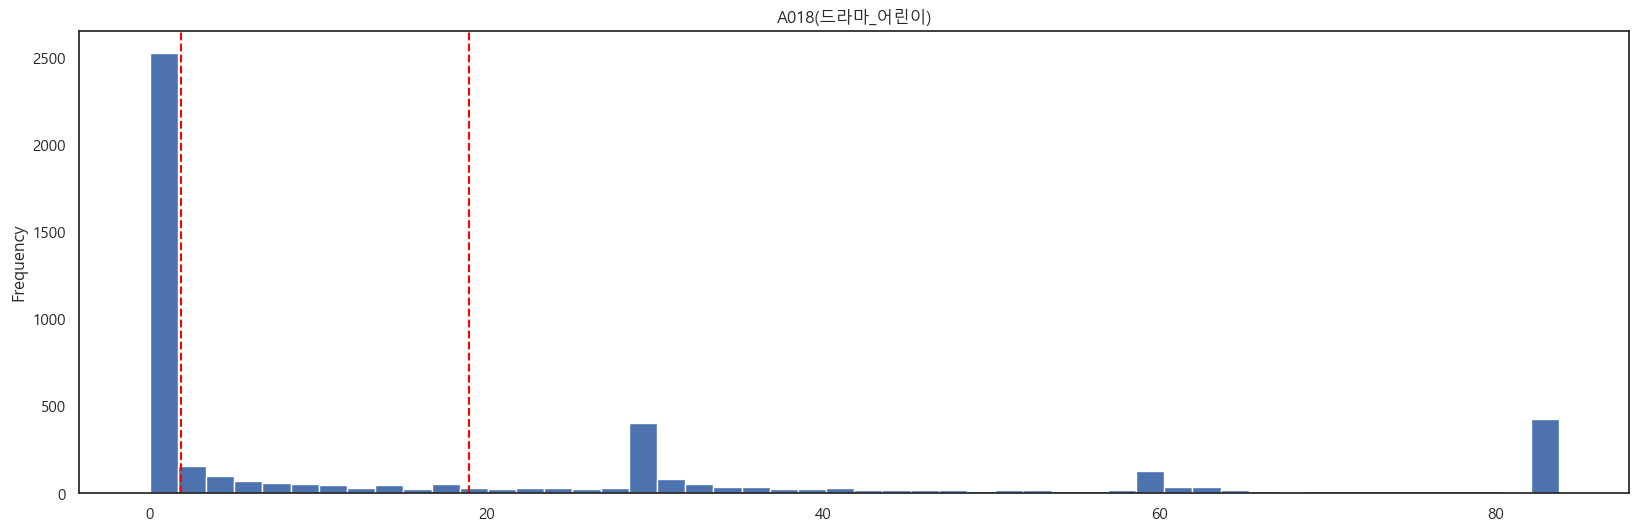

0인 개수: 1463
15.8 이하인 개수: 2034
0인 비율: 71.927 %


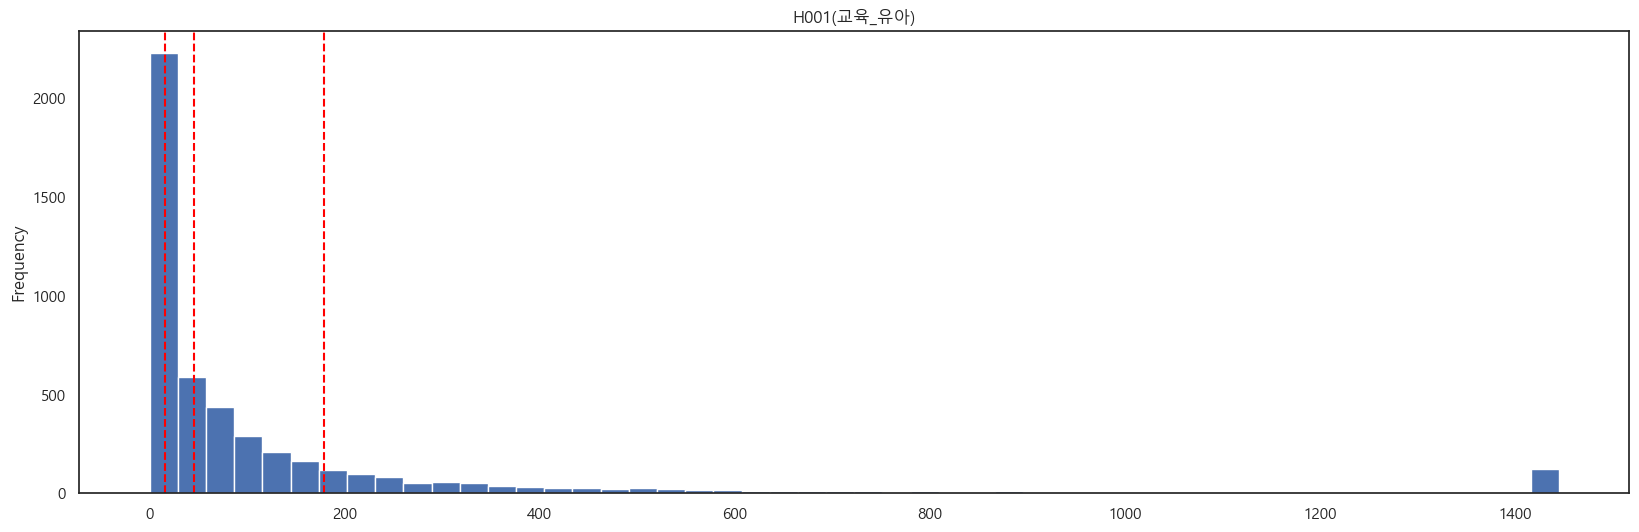

0인 개수: 3213
5.0 이하인 개수: 3698
0인 비율: 86.885 %


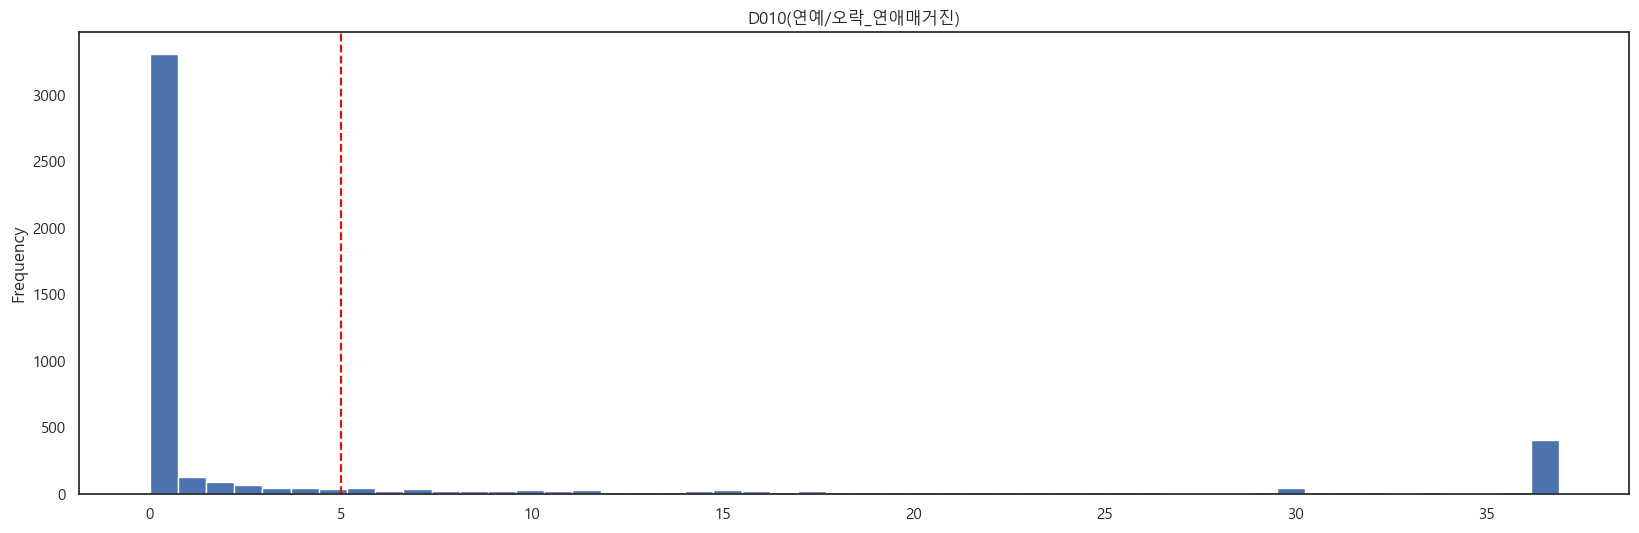

0인 개수: 3213
1.35 이하인 개수: 3412
0인 비율: 94.168 %


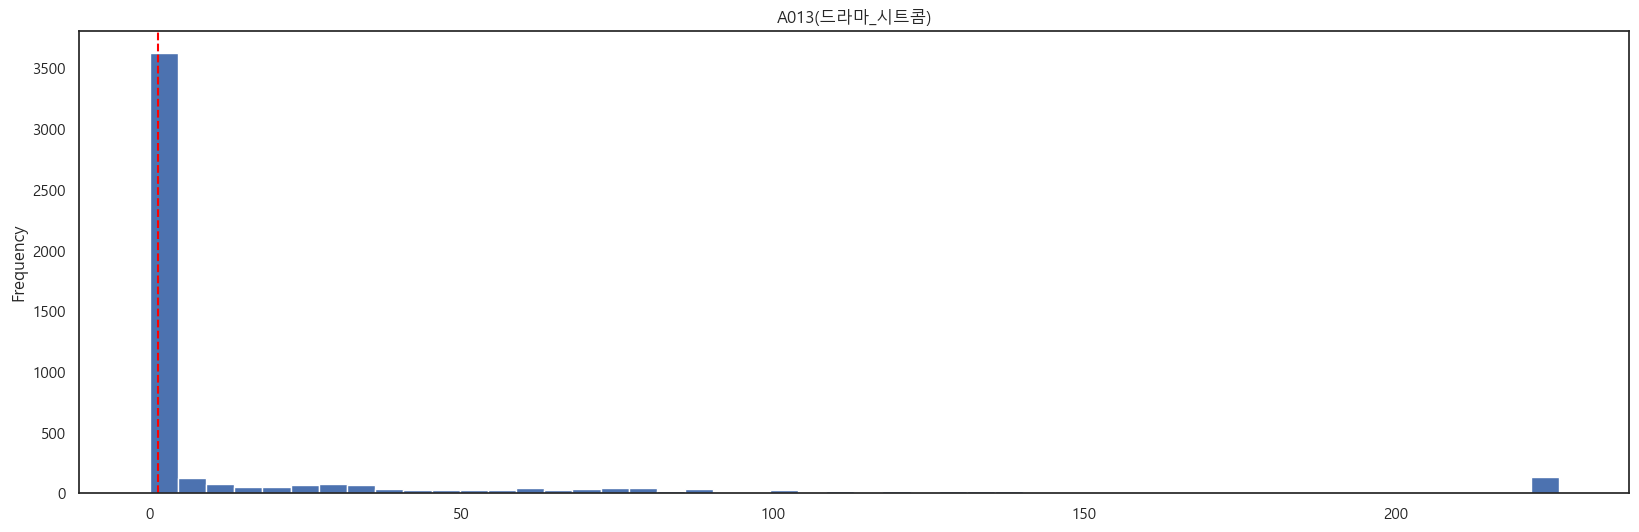

0인 개수: 2314
18.1 이하인 개수: 2868
0인 비율: 80.683 %


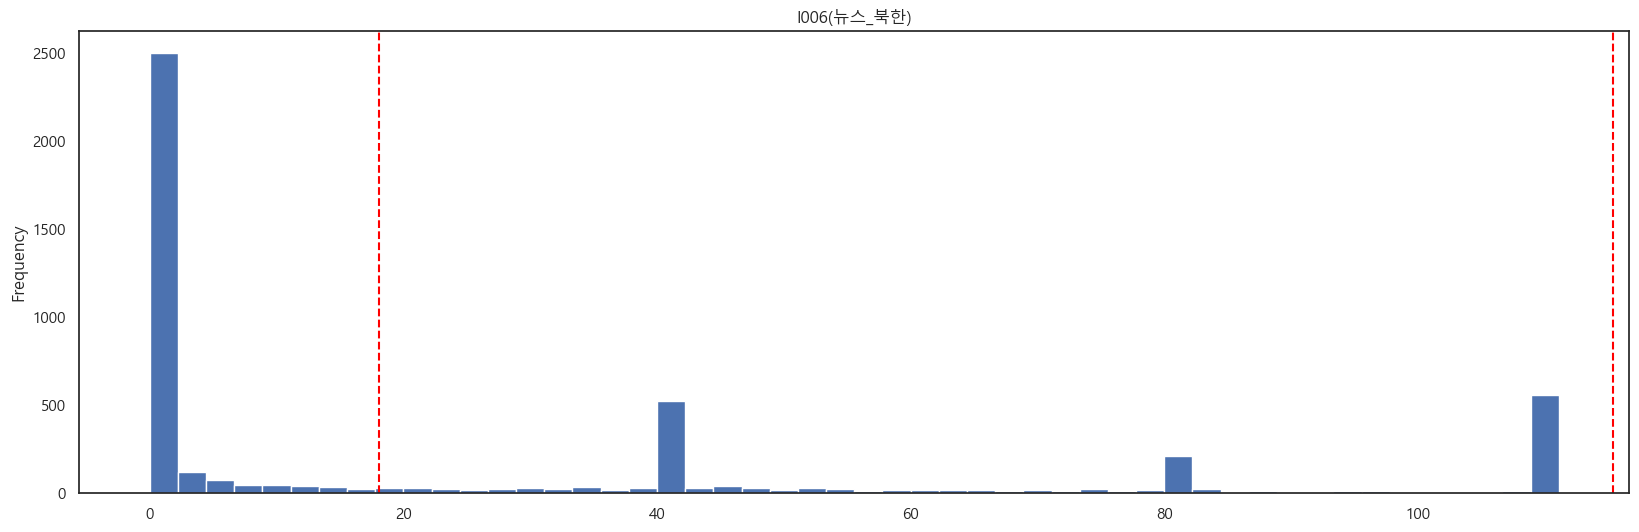

0인 개수: 1126
238.7 이하인 개수: 3596
0인 비율: 31.313 %


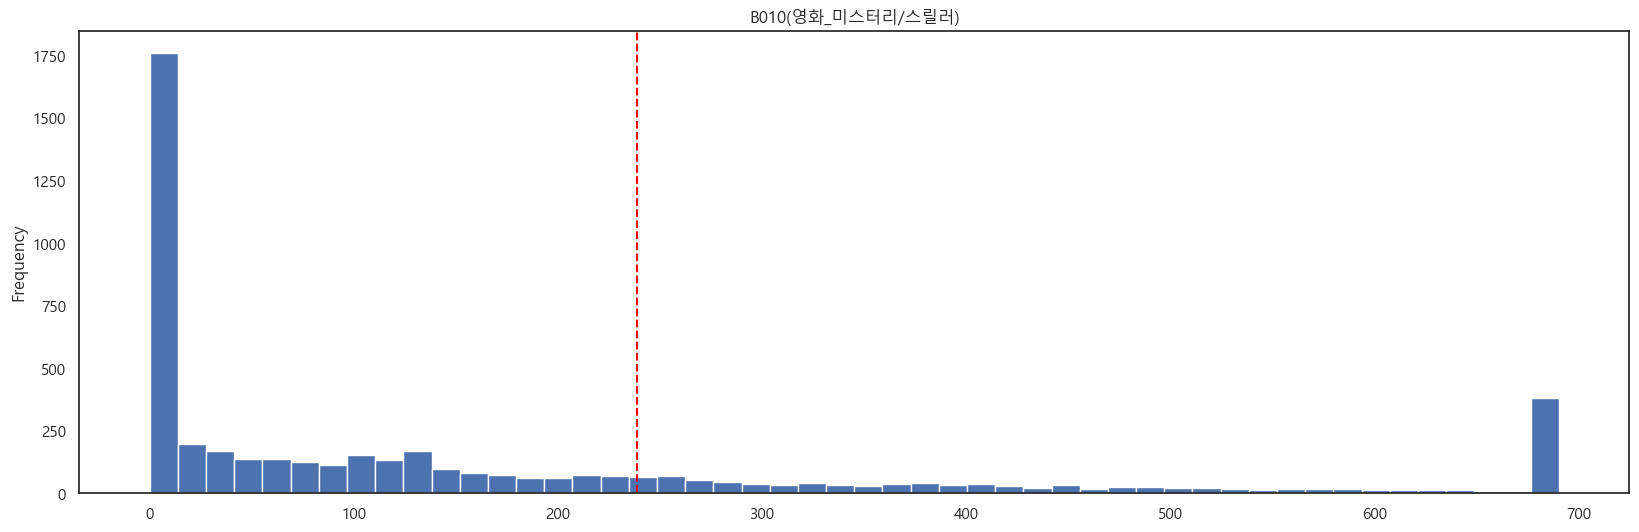

0인 개수: 3145
0.3 이하인 개수: 3145
0인 비율: 100.000 %


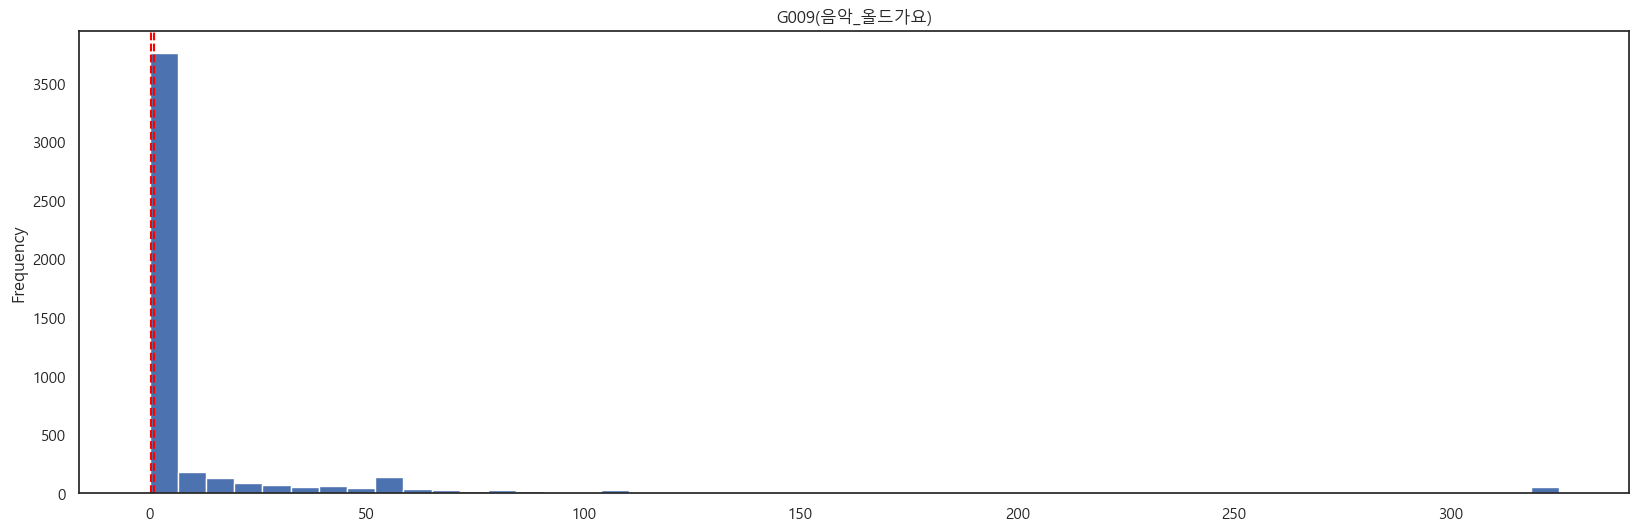

0인 개수: 3223
2.05 이하인 개수: 3625
0인 비율: 88.910 %


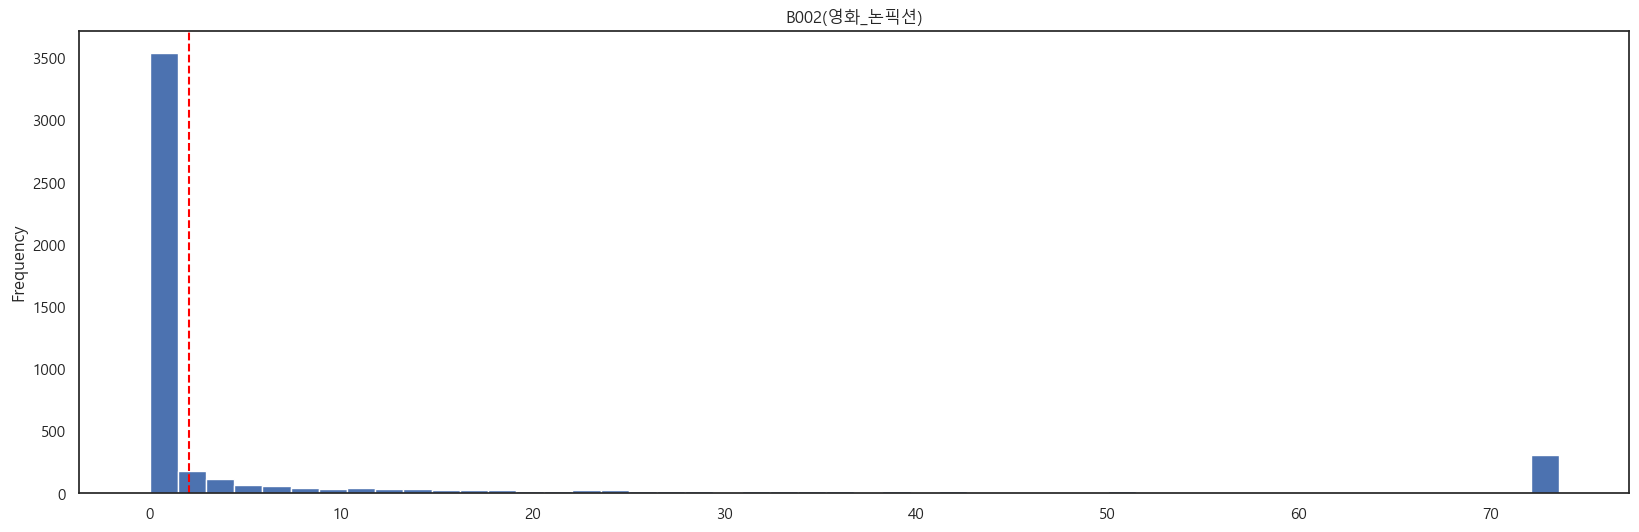

0인 개수: 2826
0.25 이하인 개수: 2826
0인 비율: 100.000 %


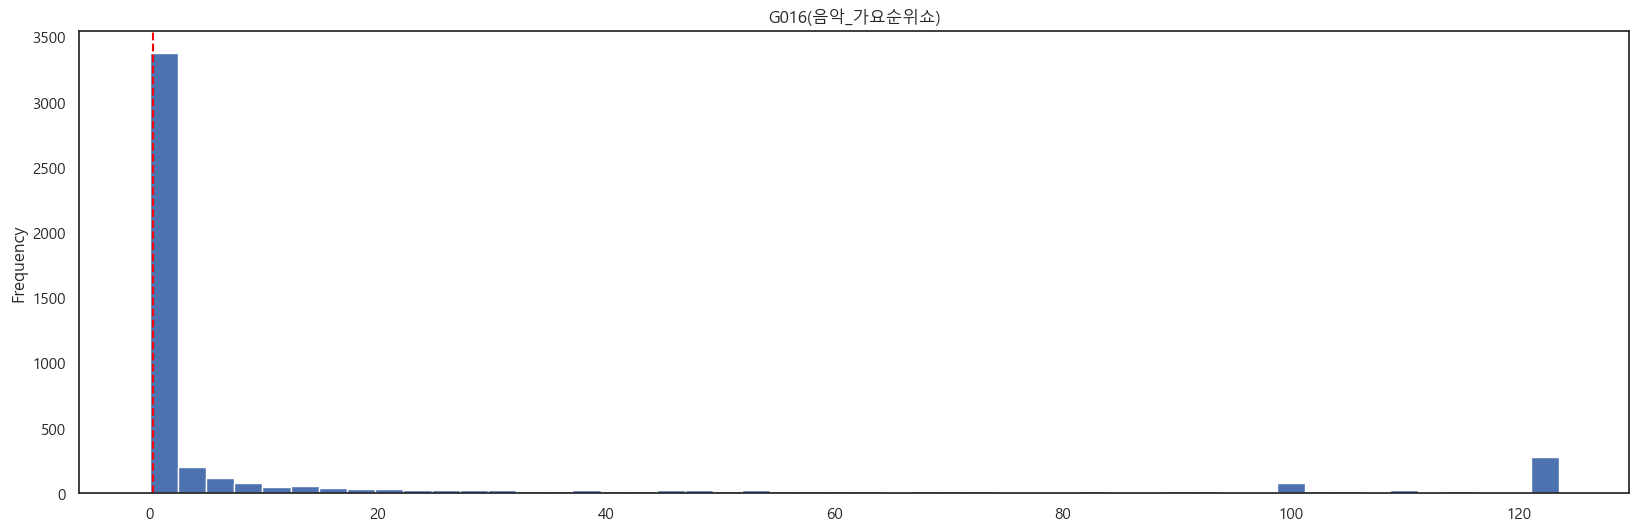

0인 개수: 765
91.0 이하인 개수: 2273
0인 비율: 33.656 %


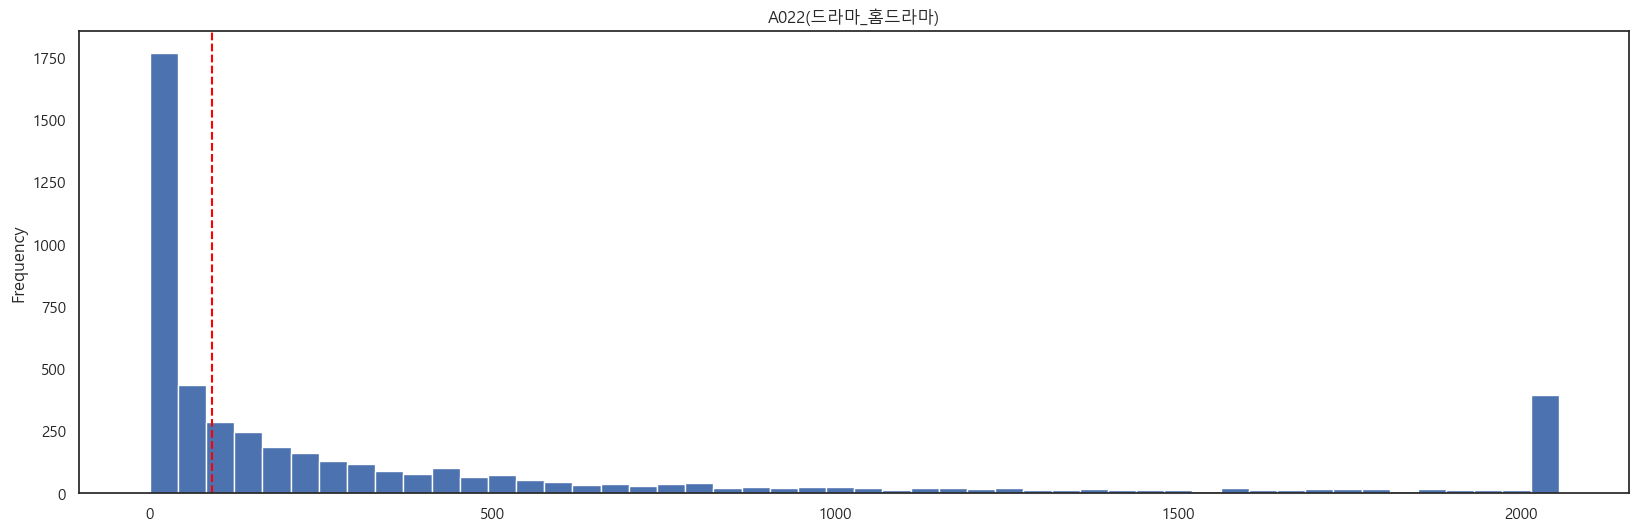

0인 개수: 1614
351.35 이하인 개수: 4808
0인 비율: 33.569 %


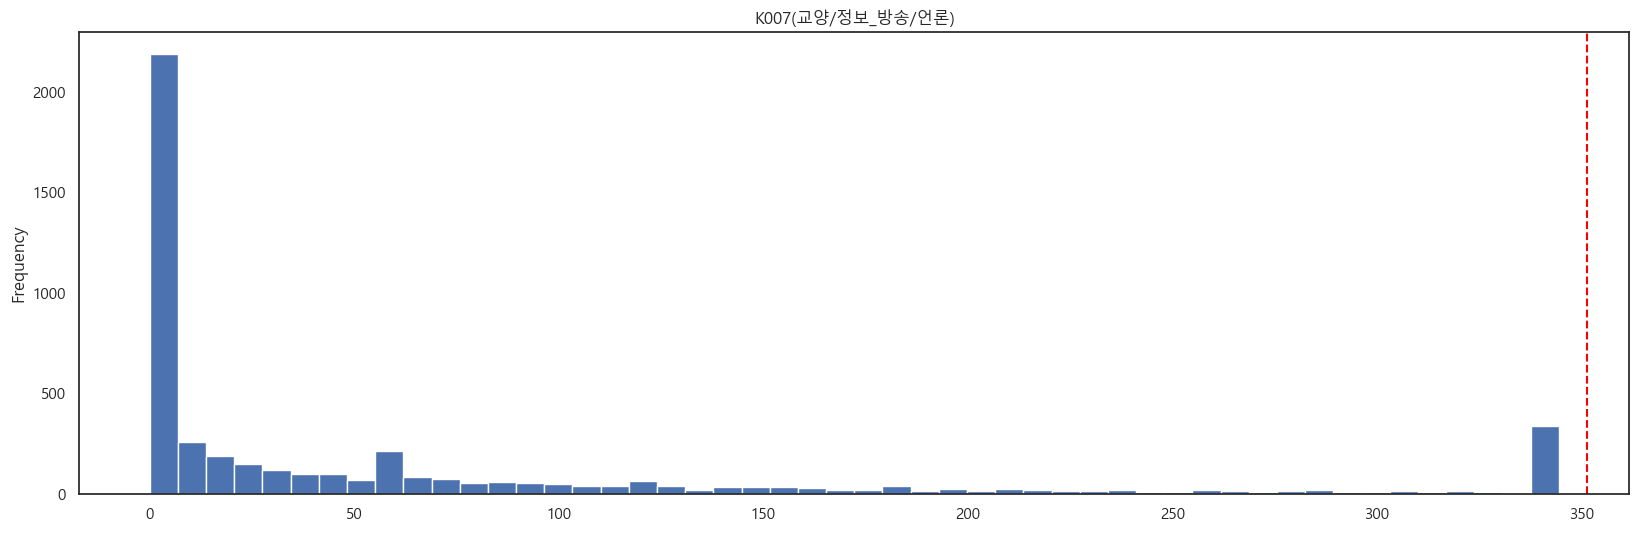

0인 개수: 4217
4.5 이하인 개수: 4506
0인 비율: 93.586 %


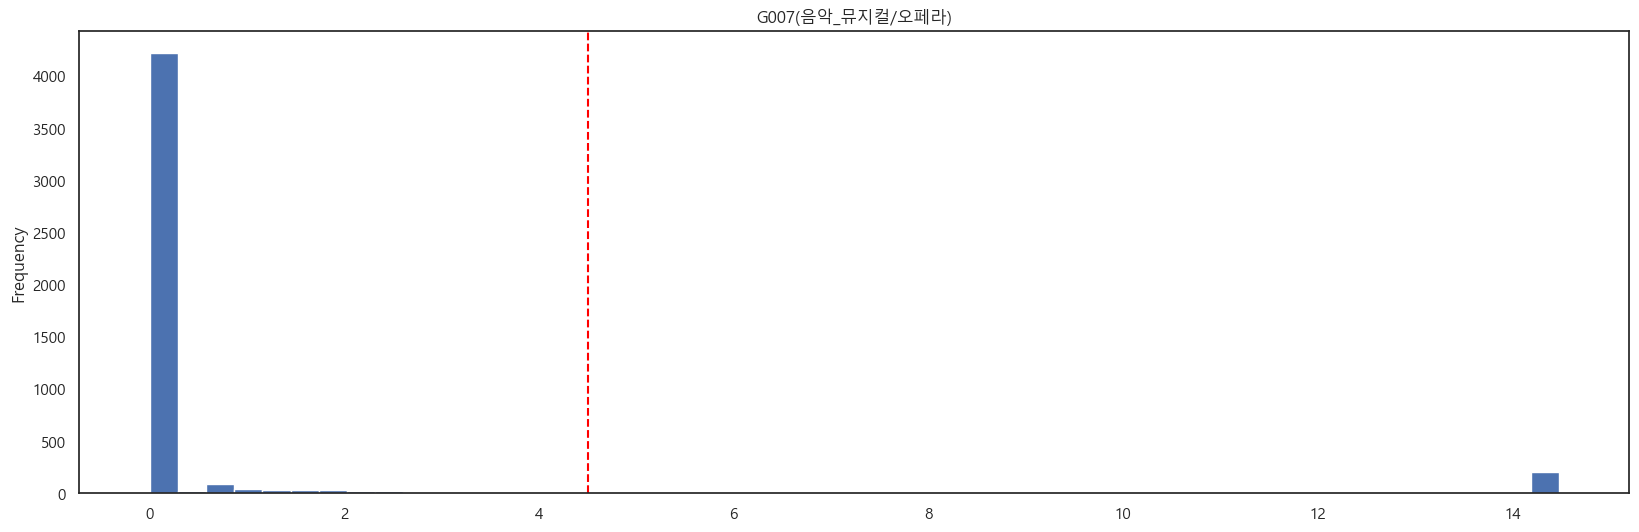

0인 개수: 900
338.563 이하인 개수: 3908
0인 비율: 23.030 %


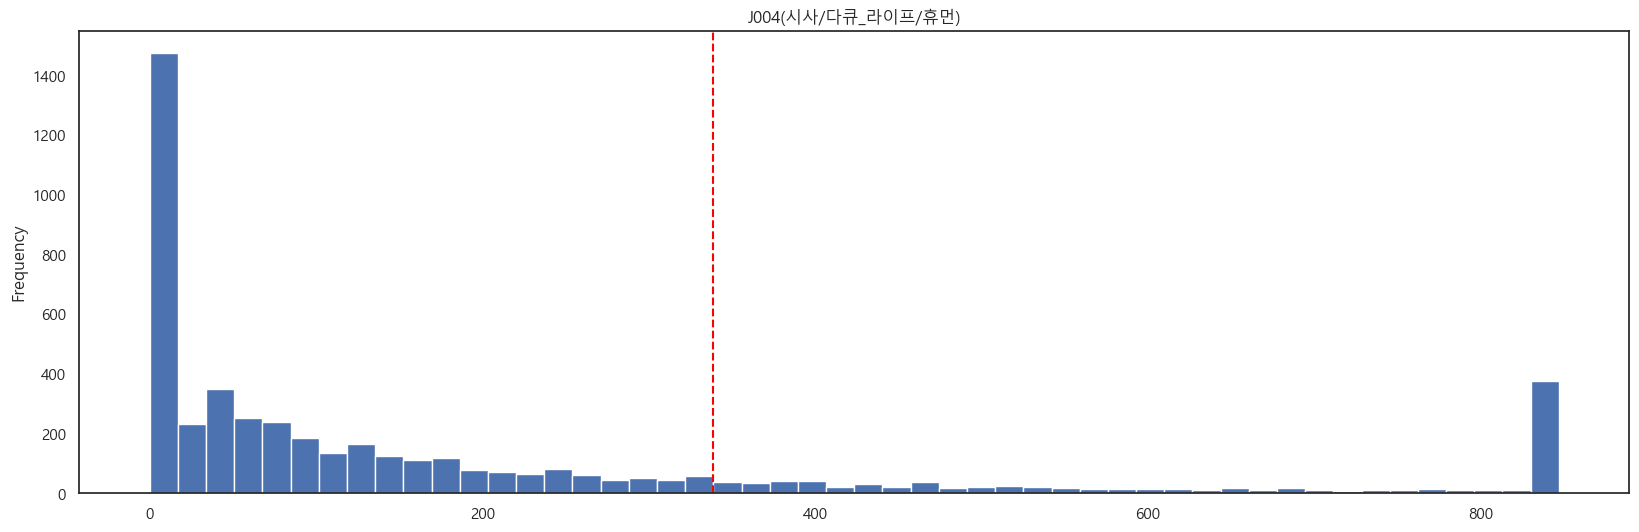

0인 개수: 1251
16.0 이하인 개수: 2049
0인 비율: 61.054 %


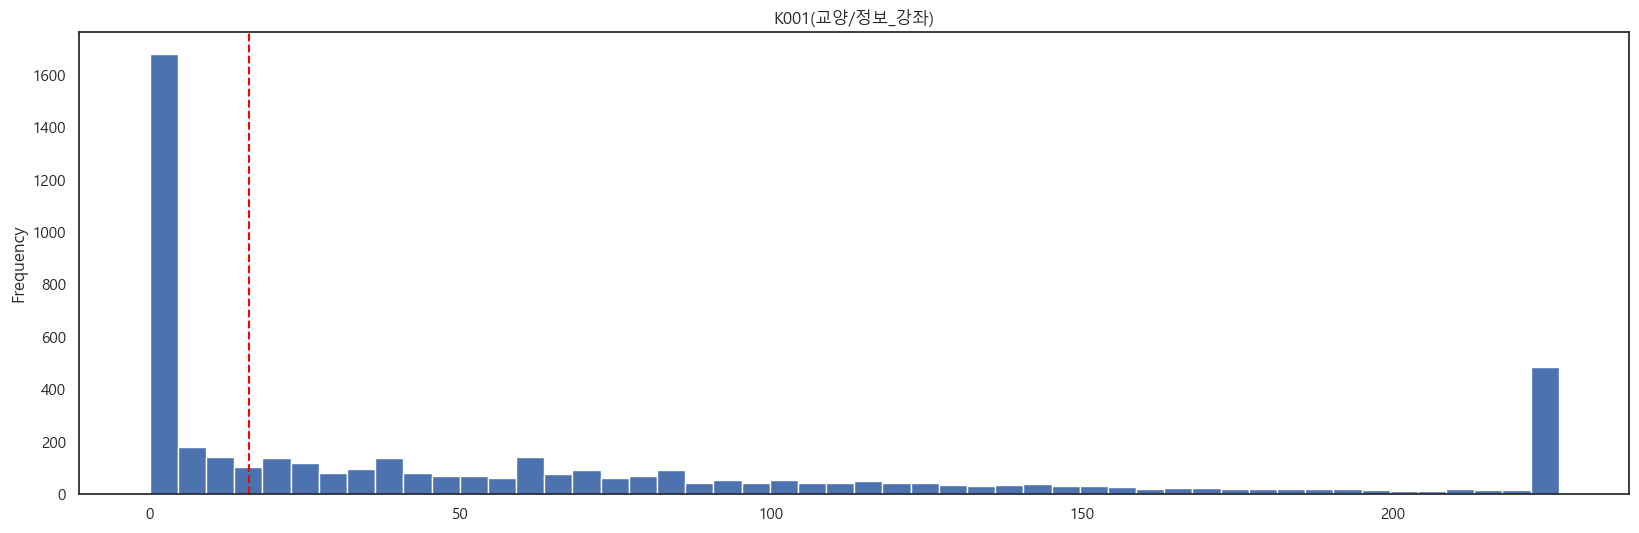

0인 개수: 1765
9.7 이하인 개수: 2607
0인 비율: 67.702 %


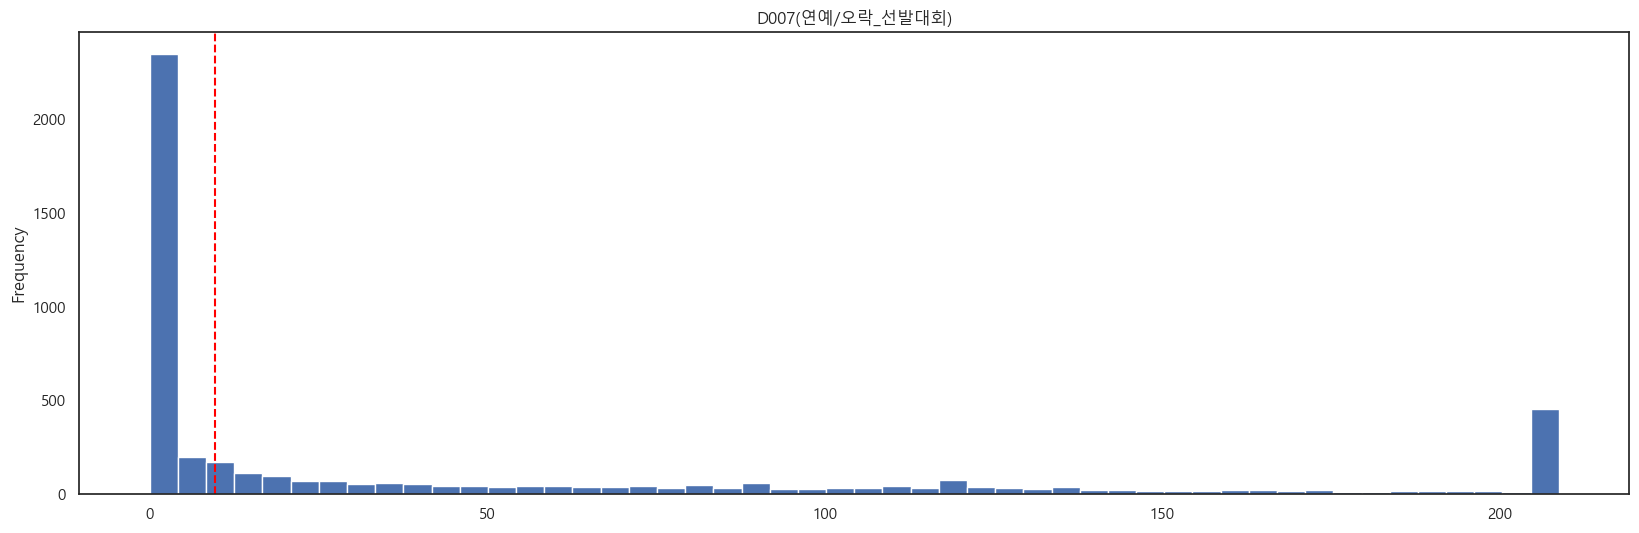

0인 개수: 2288
3.2 이하인 개수: 2709
0인 비율: 84.459 %


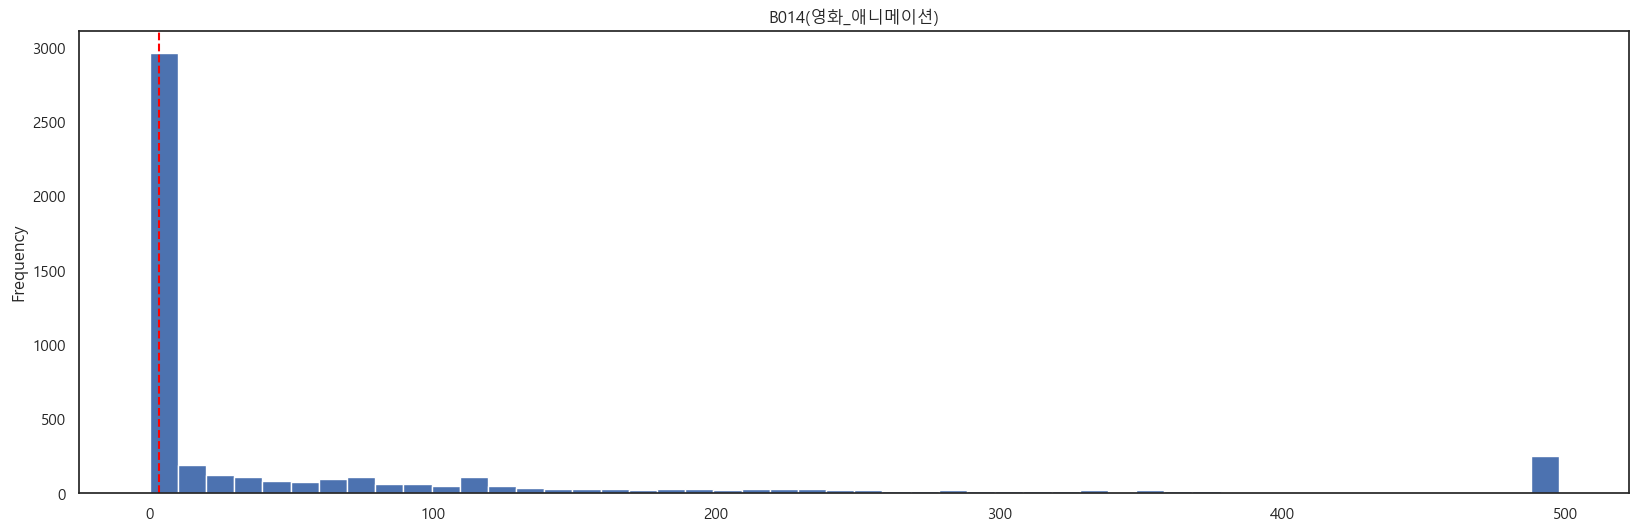

0인 개수: 2810
2.0 이하인 개수: 2943
0인 비율: 95.481 %


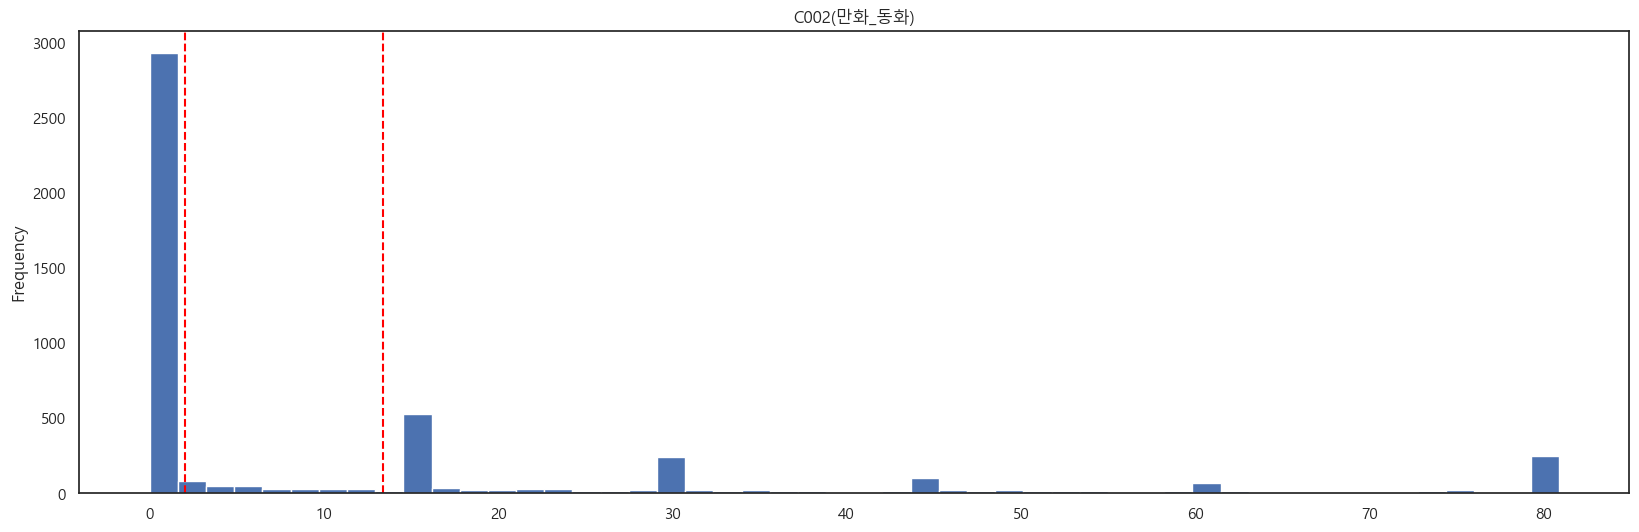

0인 개수: 755
181.85 이하인 개수: 3071
0인 비율: 24.585 %


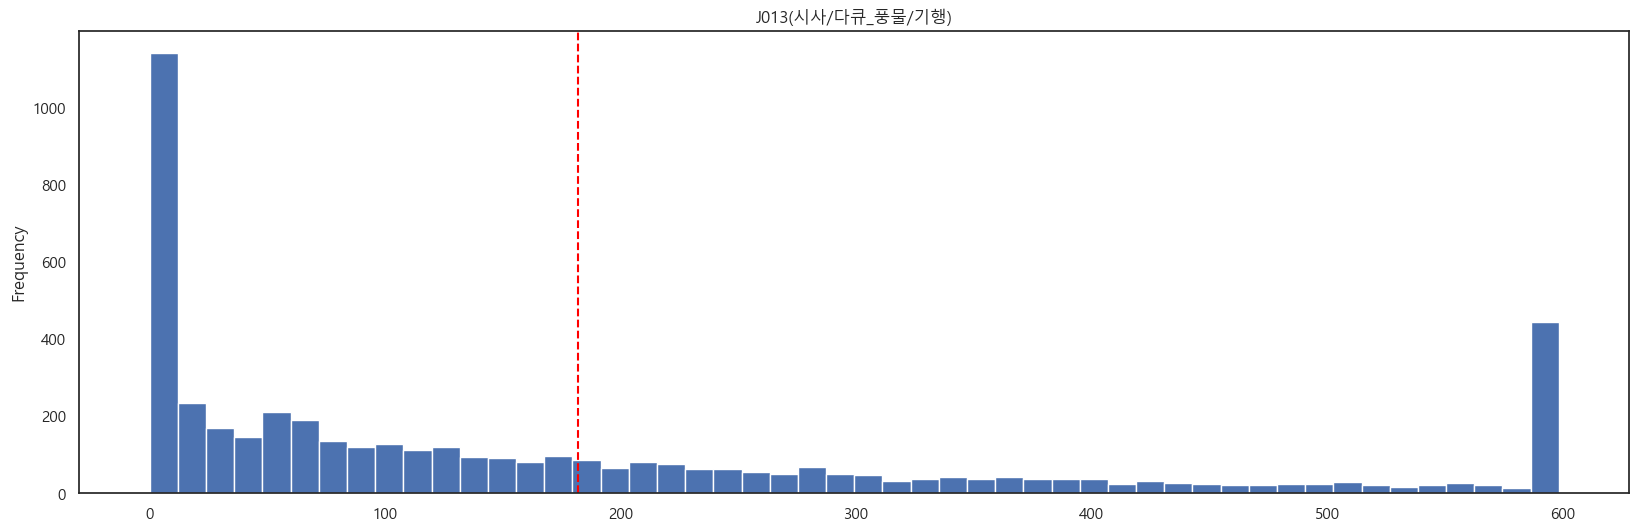

0인 개수: 2794
1.65 이하인 개수: 3214
0인 비율: 86.932 %


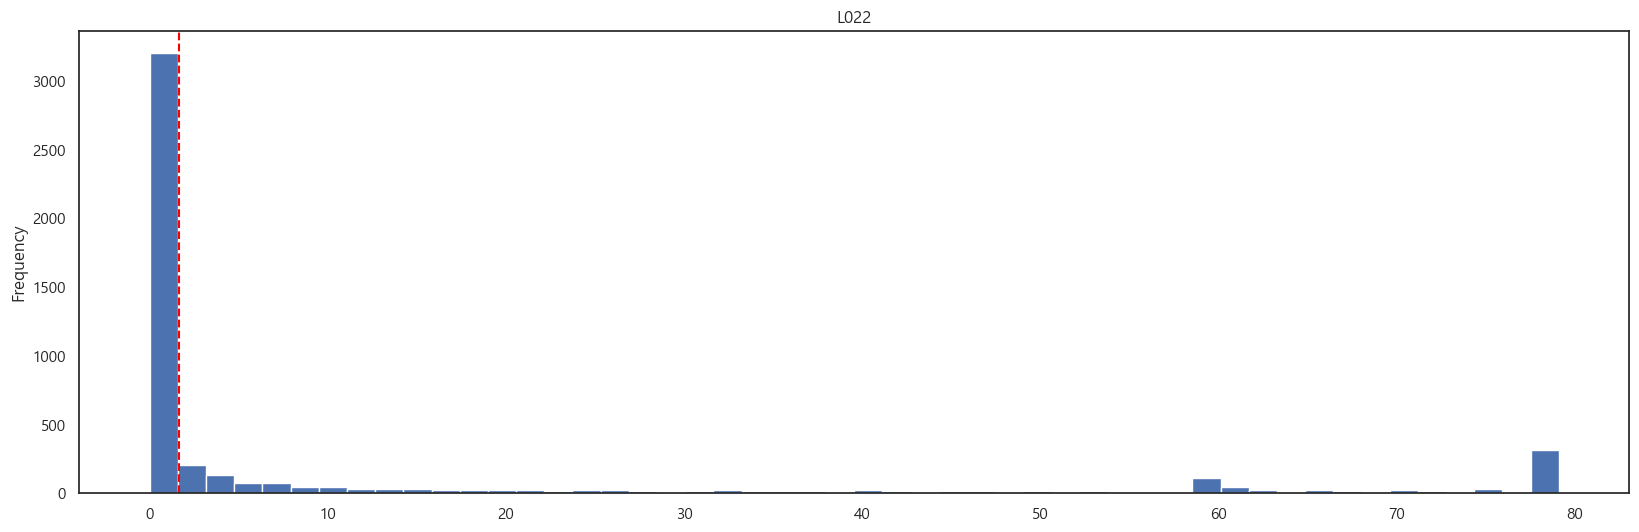

0인 개수: 1624
1.95 이하인 개수: 1897
0인 비율: 85.609 %


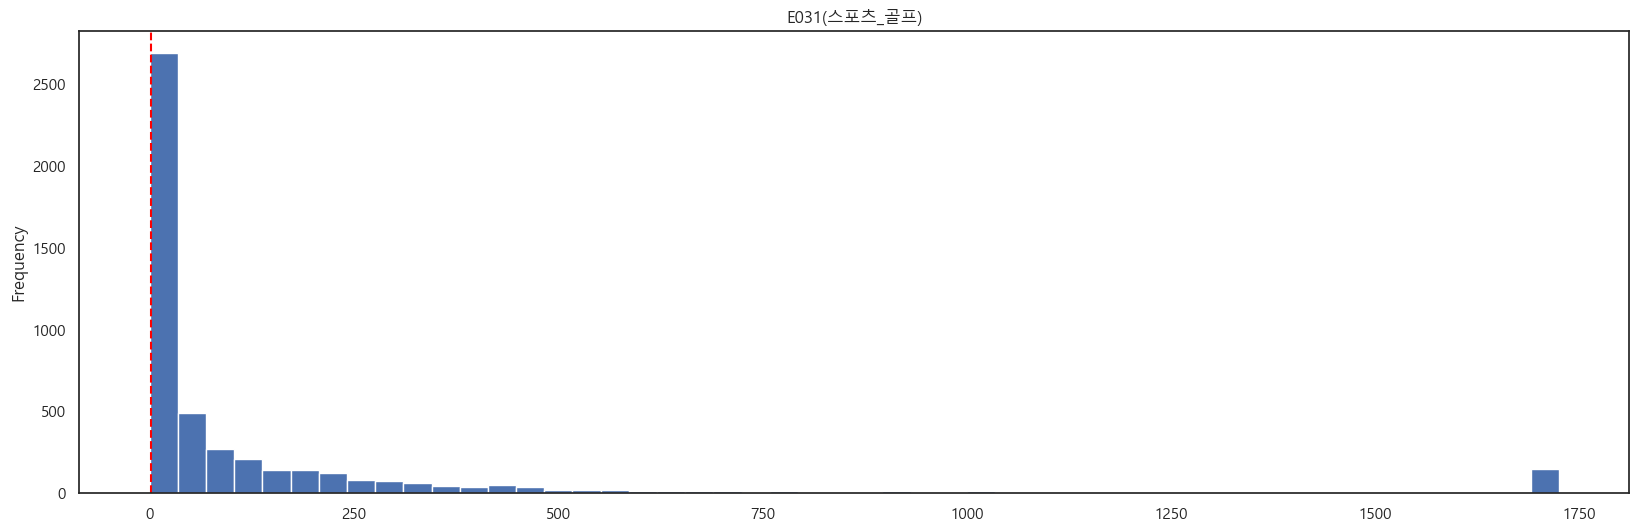

0인 개수: 2963
0.25 이하인 개수: 2963
0인 비율: 100.000 %


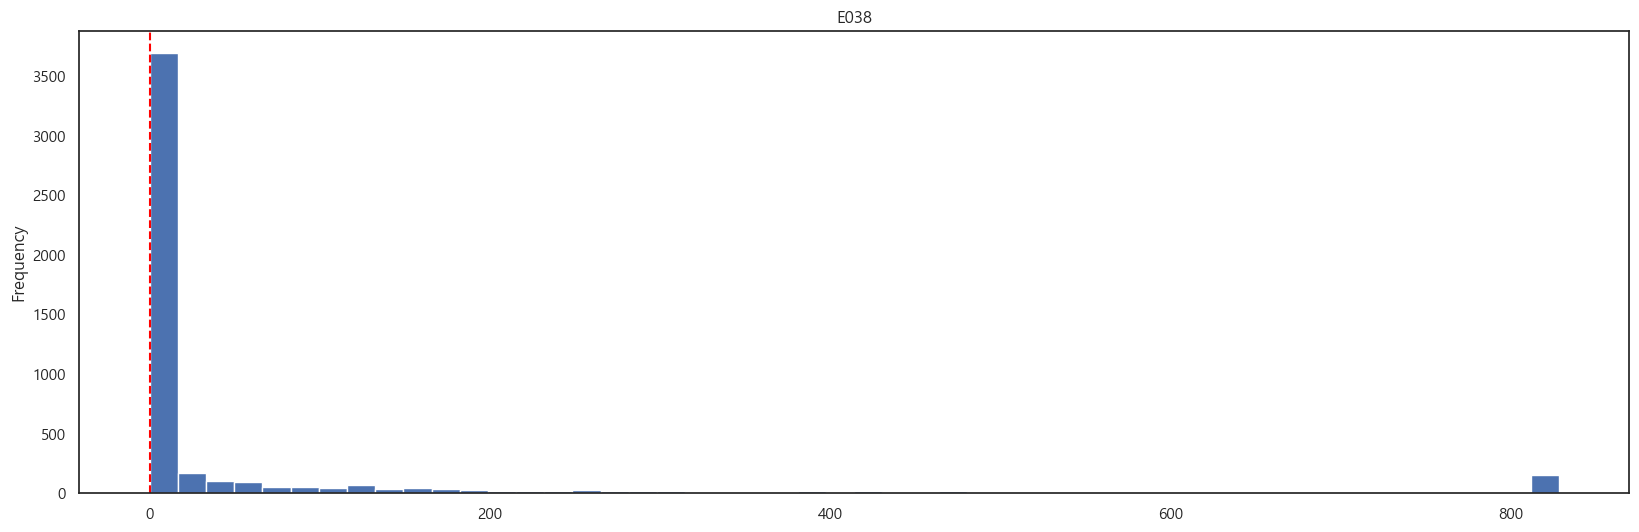

0인 개수: 1164
14.5 이하인 개수: 1825
0인 비율: 63.781 %


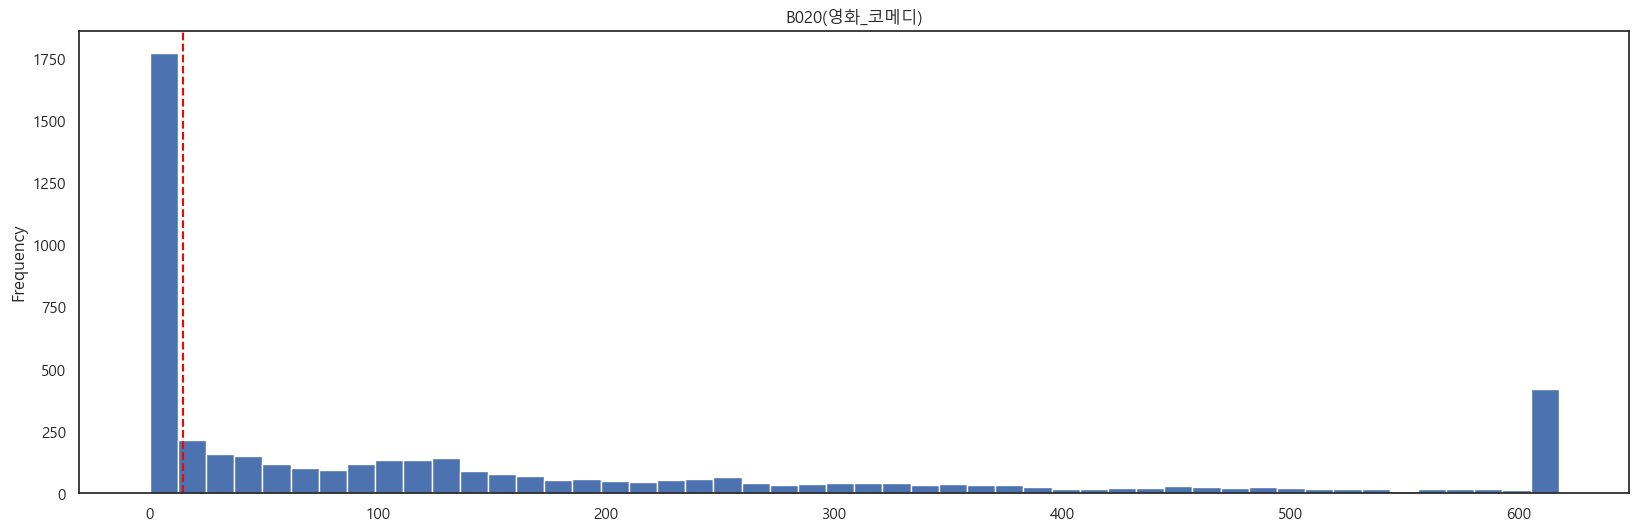

0인 개수: 554
62.9 이하인 개수: 1556
0인 비율: 35.604 %


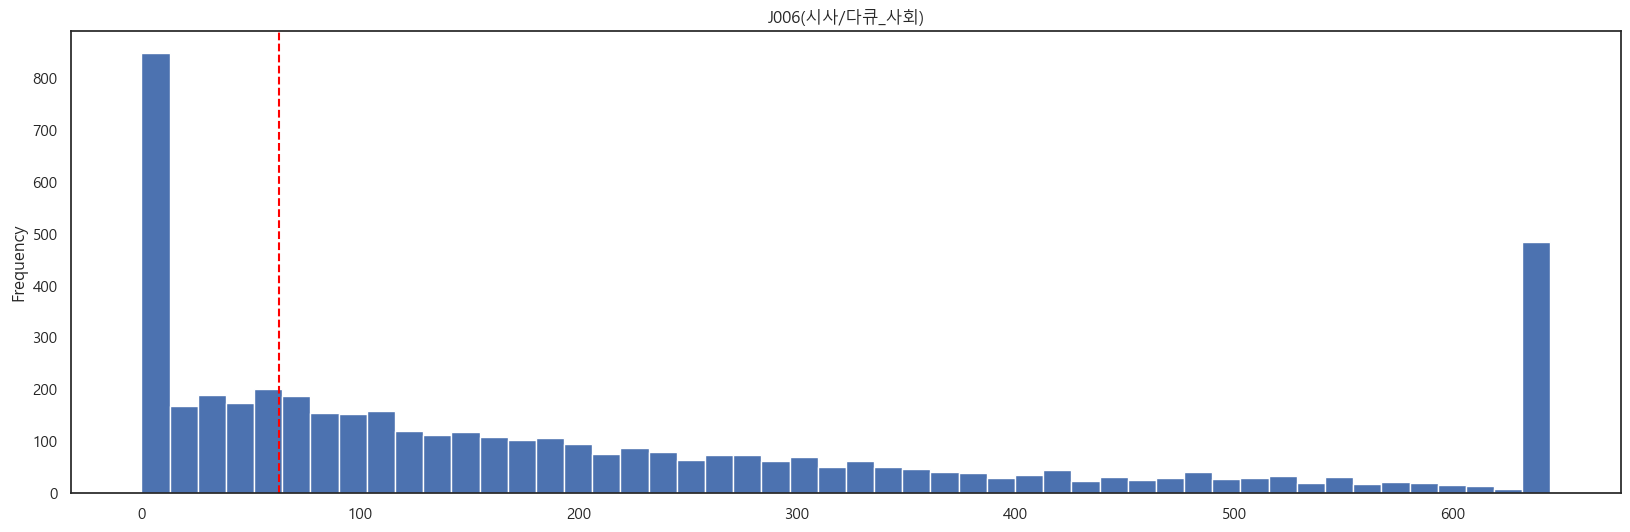

In [4]:
temp_df = pivot_df.copy()
for genre, rule_list in rule_dict.items():
    # print(temp_df[genre].mean(), temp_df[genre].std(), temp_df[genre].max())
    temp_df.loc[temp_df[genre] >= temp_df[genre].mean() + temp_df[genre].std(), genre] = temp_df[genre].mean() + temp_df[genre].std()
    plt.figure(figsize=(20,6))
    temp_df[genre].plot.hist(bins=50)
    plt.title(genre)
    
    for rule in rule_list:
        plt.axvline(rule, color='red', linestyle='--')
    
    min_rule = sorted(rule_list)[0]
    count_zero = sum(temp_df[genre] == 0)
    count_min = sum(temp_df[genre] < min_rule)

    print(f'0인 개수: {count_zero}')
    print(f'{min_rule} 이하인 개수: {count_min}')
    print(f'0인 비율: {(count_zero/count_min)*100:.3f} %')
    plt.show()